<a href="https://colab.research.google.com/github/nisha432/online-retail-customer-segmentation/blob/main/ONLINE_RETAIL_CUSTOMER_SEGMENTAION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** NISHA AHIRE 


# **Project Summary -**

Write the summary here within 500-600 words.

The project "Online Retail Customer Segmentation" focuses on analyzing customer data from an online retail business to identify different customer segments. The dataset includes information such as invoice details, product descriptions, quantities, prices, customer IDs, countries, and more.

The analysis begins with data cleaning and preprocessing steps to handle missing values, remove duplicates, and convert data types if necessary. Exploratory data analysis (EDA) techniques are then applied to gain insights into customer behavior, purchase patterns, and other relevant factors.

Some of the key EDA questions addressed in the project include:

Distribution of Quantity: Examining the distribution of the quantity of items ordered helps identify any outliers or unusual patterns in customer purchasing behavior.

Prevalence of Discounts by Month: Analyzing the percentage of invoices with discounts over different months provides insights into the fluctuation of discount usage and its impact on customer behavior.

Average Purchase Frequency by Cohort Month-Year: Calculating the average purchase frequency based on cohort month-year helps identify cohorts with higher or lower purchase frequency, enabling targeted marketing strategies.

Impact of Discounts on Average InvoiceTotal: Hypothesis testing is conducted to determine if there is a significant difference in the average InvoiceTotal between customers who received a discount and those who did not.

Identification of High-Priced Items: Analyzing the average unit prices of products helps identify specific stock codes or descriptions associated with higher unit prices. The contribution of these high-priced items to overall revenue is also assessed.


The project also explores other aspects such as outlier treatment techniques, visualizations (e.g., box plots), and text data processing (e.g., lowercasing and contraction handling). Additionally, hypothesis testing is performed to compare different customer segments and assess significant differences in key metrics.

Overall, the project aims to provide valuable insights into customer segmentation, purchase behavior, and factors influencing business growth. These insights can be leveraged to develop targeted marketing strategies, optimize pricing strategies, and enhance overall business performance in the online retail industry.



# **GitHub Link -**

## https://github.com/nisha432/online-retail-customer-segmentation/blob/main/ONLINE_RETAIL_CUSTOMER_SEGMENTAION.ipynb

# **Problem Statement**


The objective of this project is to perform unsupervised customer segmentation for an online retail business. By analyzing customer behavior and characteristics, the aim is to identify distinct customer segments that can be targeted with personalized marketing strategies. The segmentation will be based on various features such as purchase history, demographics, and customer activity .

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [13]:
# Import Libraries
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import missingno as msno
import matplotlib.cm as cm
import missingno as msno
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from scipy import stats

#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch
import plotly.graph_objects as go

!pip install kaleido

import warnings
warnings.filterwarnings('ignore')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
df=pd.read_excel("/content/drive/MyDrive/AlmaBetter/datasets/Online Retail.xlsx")

### Dataset First View

In [16]:
# Dataset First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [17]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

### Dataset Information

In [18]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [19]:
# Dataset Duplicate Value Count
# Find duplicate rows based on all columns
duplicates = df[df.duplicated()]
# Print the duplicate rows
print(duplicates)

       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice  CustomerID         Country  
517    2010-12-01 11:45:00     

#### Missing Values/Null Values

In [20]:
# Missing Values/Null Values Count

In [21]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    return summary
result = resumetable(df)
result.sort_values('Missing', ascending= False)

Dataset Shape: (541909, 8)


,Name,dtypes,Missing,Uniques,First Value,Second Value
6,CustomerID,float64,135080,4372,17850.0,17850.0
2,Description,object,1454,4223,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN
0,InvoiceNo,object,0,25900,536365,536365
1,StockCode,object,0,4070,85123A,71053
3,Quantity,int64,0,722,6,6
4,InvoiceDate,datetime64[ns],0,23260,2010-12-01 08:26:00,2010-12-01 08:26:00
5,UnitPrice,float64,0,1630,2.55,3.39
7,Country,object,0,38,United Kingdom,United Kingdom


In [22]:
 # Missing Values/Null Values Count
 print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [23]:
# Visualizing the missing values

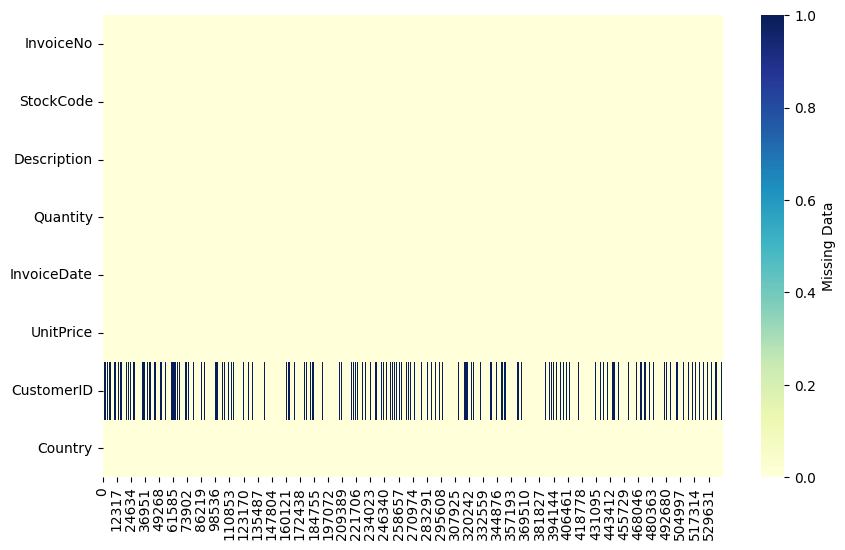

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

<Figure size 1000x600 with 0 Axes>

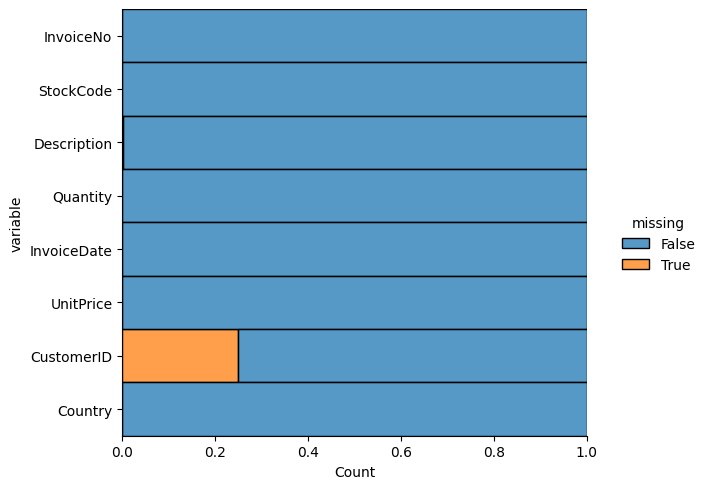

In [25]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

### What did you know about your dataset?

The given dataset has 541909 rows and 8 columns,and one columns had missing values.The following column had missing valuews-customerID 



## ***2. Understanding Your Variables***

In [26]:
# Dataset Columns

In [27]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [28]:
# Dataset Describe

In [29]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description 

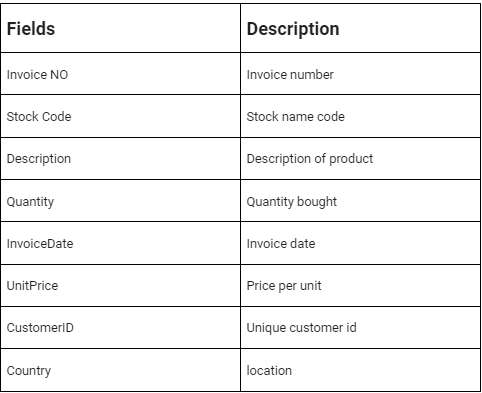

### Check Unique Values for each variable.

In [30]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column} column: {unique_values}")

Unique values in InvoiceNo column: [536365 536366 536367 ... 581585 581586 581587]
Unique values in StockCode column: ['85123A' 71053 '84406B' ... '90214U' '47591b' 23843]
Unique values in Description column: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
Unique values in Quantity column: [     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -36
   -192   -144 

In [31]:
# Checking the number of unique values for each column in the dataset
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [32]:
# Count the number of unique values in the InvoiceNo column
transactions = df['InvoiceNo'].nunique()

# Count the number of unique values in the StockCode column
products_bought = df['StockCode'].nunique()

# Count the number of unique values in the CustomerID column
customers =df['CustomerID'].nunique()

# Calculate the percentage of missing customer information
missing_customers = round(df['CustomerID'].isnull().sum() * 100 / len(df), 2)

# Count the number of unique values in the Country column
countries = df['Country'].nunique()

# Print the results
print("Number of transactions: ", transactions)
print("Number of products bought: ", products_bought)
print("Number of customers:", customers)
print("Percentage of customers NA: ", missing_customers, "%")
print('Number of countries: ', countries)


Number of transactions:  25900
Number of products bought:  4070
Number of customers: 4372
Percentage of customers NA:  24.93 %
Number of countries:  38


In [33]:
# Get the unique values of the StockCode column
unique_stock_codes = df.StockCode.unique()

# Get the shape (number of rows and columns) of the unique values of the StockCode column
stock_code_shape = unique_stock_codes.shape

# Print the result
print("Shape of unique values of StockCode column:", stock_code_shape)

Shape of unique values of StockCode column: (4070,)


In [34]:
# Get the unique values in the Description column
unique_descriptions = df.Description.unique()

# Get the number of unique values in the Description column
num_unique_descriptions = unique_descriptions.shape

# Print the result
print("Number of unique descriptions:", num_unique_descriptions[0])
     

Number of unique descriptions: 4224



The descriptions of the items in the dataset show that there are more descriptions than stock codes, meaning that some stock codes have multiple descriptions associated with them.

In [35]:
# Group the retail data by the StockCode and Description columns
cat_des_df = df.groupby(["StockCode", "Description"]).count().reset_index()

In [36]:
# Get the StockCode value counts where the count is greater than 1
# Reset the index and get the first 10 rows
head_stock_codes = (cat_des_df.StockCode.value_counts()[cat_des_df.StockCode.value_counts() > 1]
                    .reset_index().head(10))

# Show the result
head_stock_codes
     

,index,StockCode
0,20713,8
1,23084,7
2,21830,6
3,85175,6
4,85172,5
5,72807A,5
6,23343,5
7,23131,5
8,21181,5
9,21829,4


In [37]:

# Get the 7th most common StockCode
selected_stock_code = cat_des_df.StockCode.value_counts().reset_index()['index'][6]

# Get the unique descriptions for the selected stock code
unique_descriptions = df[df['StockCode'] == selected_stock_code]['Description'].unique()

# Print the result
print("Unique descriptions for stock code", selected_stock_code, ":", unique_descriptions)

Unique descriptions for stock code 23343 : ['JUMBO BAG VINTAGE CHRISTMAS ' 'came coded as 20713'
 'wrongly coded 20713' '20713 wrongly marked' 20713]


## 3. ***Data Wrangling***

### Data Wrangling Code

In [38]:
# Write your code to make your dataset analysis ready.

In [39]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [40]:
def mis_val(d):
    l=[]
    for x in d.isnull().sum().index:
        g=[]
        g.append(x)
        g.append(d[x].isnull().sum())
        per=(d[x].isnull().sum()/len(d))*100
        g.append(per)
        l.append(g)
    misd=pd.DataFrame(l)
    misd.columns=['Column','Missing Value','Percentage of Missing Value']
    misd.sort_values(by='Percentage of Missing Value',ascending=False,inplace=True)
    return misd

In [41]:
mis_val(df)

,Column,Missing Value,Percentage of Missing Value
6,CustomerID,135080,24.926694
2,Description,1454,0.268311
0,InvoiceNo,0,0.000000
1,StockCode,0,0.000000
3,Quantity,0,0.000000
4,InvoiceDate,0,0.000000
5,UnitPrice,0,0.000000
7,Country,0,0.000000


 handling missing values 

In [42]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [43]:
# Replace missing values with the mean of the column
df.fillna(df.mean(), inplace=True)

# Replace missing values with the median of the column
df.fillna(df.median(), inplace=True)




In [44]:
# Replace missing values with the mode of the column
df.fillna(df.mode().iloc[0], inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

handling outliers

In [45]:


# Calculate z-scores for numerical columns excluding datetime columns
numerical_columns = df.select_dtypes(include=np.number).columns
z_scores = (df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std()

# Define a threshold for outlier detection (e.g., z-score > 3)
outlier_threshold = 3

# Identify outliers based on z-scores and remove them
df_no_outliers = df[(z_scores < outlier_threshold).all(axis=1)]


In [46]:
df_no_outliers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


handling inconsistency 

In [47]:
# Iterate over each column
for column in df_no_outliers.columns:
    # Check if the column has inconsistent values
    if len(df_no_outliers[column].unique()) > 1:
        print(f"Inconsistencies found in column: {column}")


Inconsistencies found in column: InvoiceNo
Inconsistencies found in column: StockCode
Inconsistencies found in column: Description
Inconsistencies found in column: Quantity
Inconsistencies found in column: InvoiceDate
Inconsistencies found in column: UnitPrice
Inconsistencies found in column: CustomerID
Inconsistencies found in column: Country


In [48]:
# Assuming your dataset is in a pandas DataFrame called 'df'

# Find the count of inconsistencies in each column
inconsistency_counts = (df_no_outliers != df_no_outliers.shift()).sum()

# Get the columns with inconsistencies
columns_with_inconsistencies = inconsistency_counts[inconsistency_counts > 0].index.tolist()

# Print the inconsistency counts for each column
for column in columns_with_inconsistencies:
    inconsistency_count = inconsistency_counts[column]
    print(f"Inconsistency count in column '{column}': {inconsistency_count}")

# Remove inconsistencies from all columns
df_cleaned = df_no_outliers.dropna().ffill()




Inconsistency count in column 'InvoiceNo': 25640
Inconsistency count in column 'StockCode': 539598
Inconsistency count in column 'Description': 538599
Inconsistency count in column 'Quantity': 334333
Inconsistency count in column 'InvoiceDate': 23060
Inconsistency count in column 'UnitPrice': 391034
Inconsistency count in column 'CustomerID': 22611
Inconsistency count in column 'Country': 4155


In [49]:
df_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# dropping duplicates

In [50]:
print("Shape before dropping duplicates", df_cleaned.shape)
df_cleaned = df_cleaned.drop_duplicates()
print("Shape after dropping duplicates", df_cleaned.shape)

Shape before dropping duplicates (541281, 8)
Shape after dropping duplicates (536014, 8)


In [51]:
df_cleaned.shape

(536014, 8)

In [52]:
df.shape

(541909, 8)

### What all manipulations have you done and insights you found?

 we handle missing values by filling them with the mean value of each column using the fillna() function.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [53]:
# Chart - 1 visualization code

In [54]:
import pandas as pd

# Assuming your dataset is in a pandas DataFrame called 'df' with a 'Country' column

# Group the data by 'Country' and count the number of orders
country_orders =df_cleaned['Country'].value_counts()

# Get the country with the maximum number of orders
country_with_max_orders = country_orders.idxmax()

# Print the country with the maximum number of orders
print("Country with maximum orders:", country_with_max_orders)


Country with maximum orders: United Kingdom


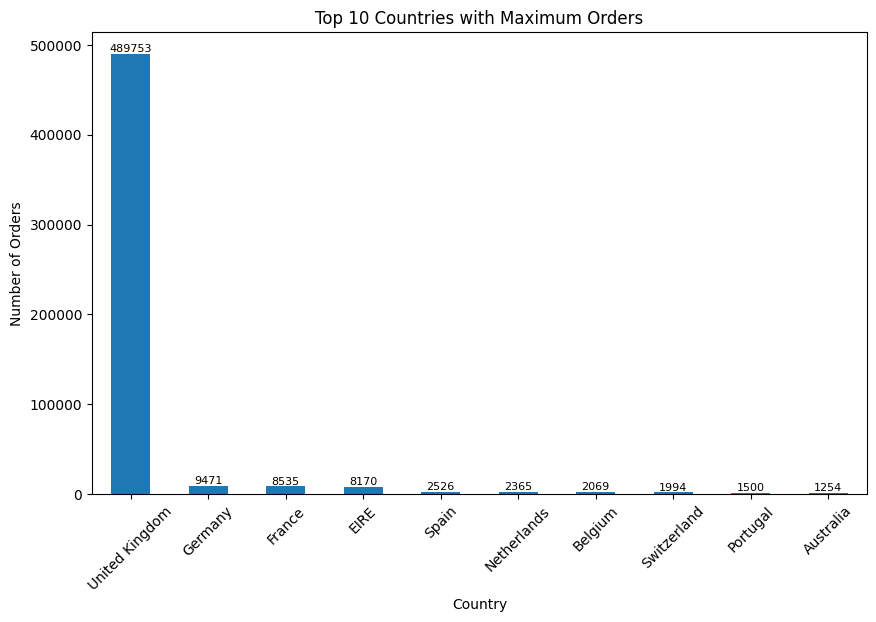

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is in a pandas DataFrame called 'df_cleaned' with a 'Country' column

# Group the data by 'Country' and count the number of orders
country_orders = df_cleaned['Country'].value_counts().head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
country_orders.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Orders')

# Add the number of orders as labels on top of the bars
for i, v in enumerate(country_orders):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=8)

plt.title('Top 10 Countries with Maximum Orders')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

I have chosen this graph to identify the country with the highest number of orders.

##### 2. What is/are the insight(s) found from the chart?


After visualizing the graph, we can observe that the United Kingdom has the highest number of orders, followed by Germany and France.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


The insights gained from identifying countries with the highest number of orders have the potential to create a positive business impact by allowing businesses to target those markets and allocate resources effectively. This can lead to increased sales, customer satisfaction, and overall growth. However, there are certain considerations that could result in negative growth. These include market saturation, geographic constraints, cultural factors, and economic conditions. Market saturation and intense competition in identified countries may limit growth opportunities. Geographic constraints such as high shipping costs or infrastructure limitations can hinder efficient operations. Cultural factors and failure to adapt to local preferences may negatively impact customer engagement. Additionally, economic instability or limited purchasing power in certain countries can present challenges to sustainable growth. To mitigate negative impacts, businesses should conduct thorough research, tailor strategies, and adapt to specific market conditions to maximize the positive impact of the gained insights.

#### Chart - 2

In [56]:
df_cleaned.columns 

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [57]:
# Chart - 2 visualization code

We will look for invoices with the letter "c" in the InvoiceNo column to see if there is an invoice with the quantity of -80995. If so, this would confirm that negative quantities correspond to cancelled orders.

In [58]:
# Create a variable 'cancelled_orders' to store all the rows in 'df_cleaned' where the value in the 'InvoiceNo' column contains the character 'C'
cancelled_orders = df_cleaned[df_cleaned['InvoiceNo'].astype(str).str.contains('C')]

# Display the first 5 rows of 'cancelled_orders' dataframe
cancelled_orders.head()
     

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [59]:
# Find a transaction where the quantity is -80995
cancelled_orders[cancelled_orders['Quantity']==-80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


In [60]:
# Get the number of unique invoice numbers in the df_cleaned DataFrame
total_orders_count = df_cleaned['InvoiceNo'].nunique()

# Get the number of rows in the cancelled_orders DataFrame
cancelled_orders_count = len(cancelled_orders)

# Calculate the percentage of cancelled orders as a fraction of the total number of orders
cancelled_orders_percentage = cancelled_orders_count / total_orders_count * 100

# Print the results
print(f"Number of cancelled orders: {cancelled_orders_count}")
print(f"Percentage of cancelled orders: {cancelled_orders_percentage:.2f}%")

Number of cancelled orders: 9111
Percentage of cancelled orders: 35.54%


In [61]:
# Determine the number of cancelled orders for each country
cancel_order_country = cancelled_orders.groupby('Country')['InvoiceNo'].count().reset_index()

# Sort the country-wise count of cancelled orders in descending order and get the top 10 countries
cancel_order_country_top10 = cancel_order_country.sort_values('InvoiceNo',ascending=False, ignore_index=True).head(10)
cancel_order_country_top10

,Country,InvoiceNo
0,United Kingdom,7711
1,Germany,449
2,EIRE,294
3,France,146
4,USA,112
5,Australia,74
6,Spain,46
7,Italy,45
8,Belgium,38
9,Japan,37


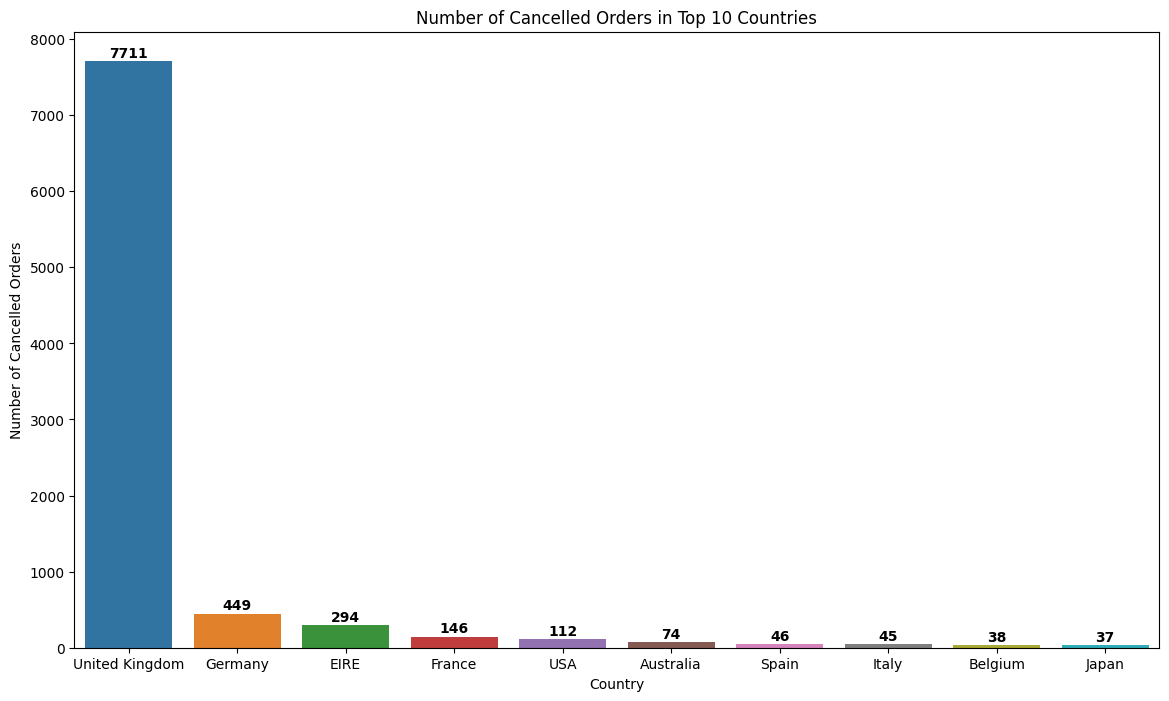

In [62]:

# Set the size of the figure to be displayed
plt.figure(figsize=(14,8))

# Plot the bar chart using Seaborn
sns.barplot(x='Country', y='InvoiceNo', data=cancel_order_country_top10)

# Add annotations on the bar charts
for i, v in enumerate(cancel_order_country_top10['InvoiceNo']):
    plt.text(i, v+50, str(v), ha='center', fontweight='bold')

# Add labels and title to the chart
plt.xlabel('Country') # Label for the x-axis
plt.ylabel('Number of Cancelled Orders') # Label for the y-axis
plt.title('Number of Cancelled Orders in Top 10 Countries') # Title for the chart

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

I have chosen this graph to determine the country with the highest number of cancelled orders.

##### 2. What is/are the insight(s) found from the chart?

1.  A large number of orders, 35.86%, were cancelled

2. The country with the highest number of cancelled orders is the United Kingdom, followed by Germany in the second position, and Eire in the third position.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from identifying the countries with the highest number of cancelled orders, namely the United Kingdom, Germany, and Eire, can have both positive and negative implications for business growth. On the positive side, understanding these countries allows businesses to focus on improving customer satisfaction, refining product offerings, and optimizing logistics, which can lead to increased customer retention and positive business impact. However, the presence of high cancellations in specific countries can also indicate negative growth factors such as customer dissatisfaction, market viability challenges, or operational inefficiencies. It is crucial for businesses to analyze these insights and take appropriate actions to address any negative trends and drive positive growth.

#### Chart - 3

In [63]:
# Chart - 3 visualization code

In [64]:
# Group the retail data by customer ID and count the number of unique invoices for each customer ID
groupby_customers = pd.DataFrame(df_cleaned.groupby("CustomerID")["InvoiceNo"].nunique())

# Display the first 5 rows of the resulting dataframe
print(groupby_customers.head())

            InvoiceNo
CustomerID           
12346.0             1
12347.0             7
12348.0             4
12349.0             1
12350.0             1


In [65]:

# Display summary statistics for the groupby_customers dataframe
groupby_customers.describe()

,InvoiceNo
count,4359.000000
mean,5.881854
std,55.335072
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,3607.000000


On average, each customer places 5 orders.

In [66]:

# Group the retail_df dataframe by InvoiceNo and CustomerID
temp_df = df_cleaned.groupby(['InvoiceNo','CustomerID'], as_index=False)

# Count the number of products in each invoice
temp_df = temp_df['InvoiceDate'].count()

# Rename the column 'InvoiceDate' to 'Number of products'
transaction_df = temp_df.rename(columns = {'InvoiceDate':'Number of products'})

# Print the result
print(transaction_df.head())

  InvoiceNo  CustomerID  Number of products
0    536365     17850.0                   7
1    536366     17850.0                   2
2    536367     13047.0                  12
3    536368     13047.0                   4
4    536369     13047.0                   1


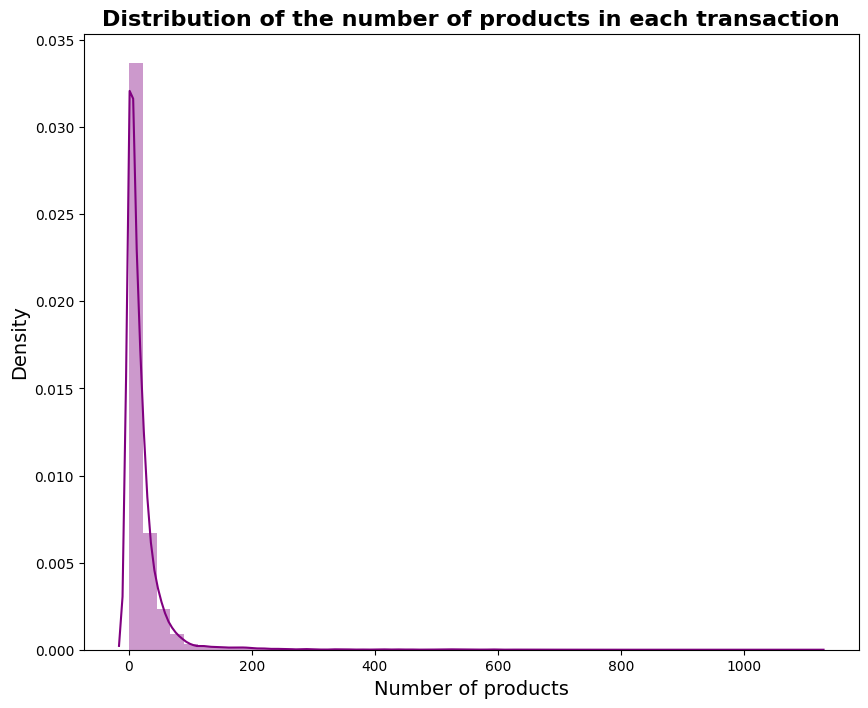

In [67]:
# Set the size of the plot
plt.figure(figsize=(10, 8))

# Plot the distribution of the number of products in each transaction
sns.distplot(transaction_df['Number of products'], color='purple')

# Add a title to the plot
plt.title("Distribution of the number of products in each transaction", fontsize=16, fontweight='bold')

# Add a label to the x-axis
plt.xlabel("Number of products", fontsize=14)

# Add a label to the y-axis
plt.ylabel("Density", fontsize=14)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

A histogram was chosen to visualize the distribution of the number of products in each transaction because it allows us to see the frequency of different values in a continuous variable.

##### 2. What is/are the insight(s) found from the chart?

The distribution of the number of products in each transaction is heavily skewed. The majority of customers purchase fewer than 25 items in a single transaction.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this histogram could be used to inform decisions about inventory management and product pricing. For example, if the data shows that most transactions involve only one or two products, a business may decide to focus on promoting those particular products or adjusting pricing to encourage customers to purchase more items per transaction.

#### Chart - 4

In [68]:
# Chart - 4 visualization code

In [69]:
Description_df=df_cleaned['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)
#top 5 Description Name
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,3797
1,REGENCY CAKESTAND 3 TIER,2189
2,JUMBO BAG RED RETROSPOT,2153
3,PARTY BUNTING,1720
4,LUNCH BAG RED RETROSPOT,1625


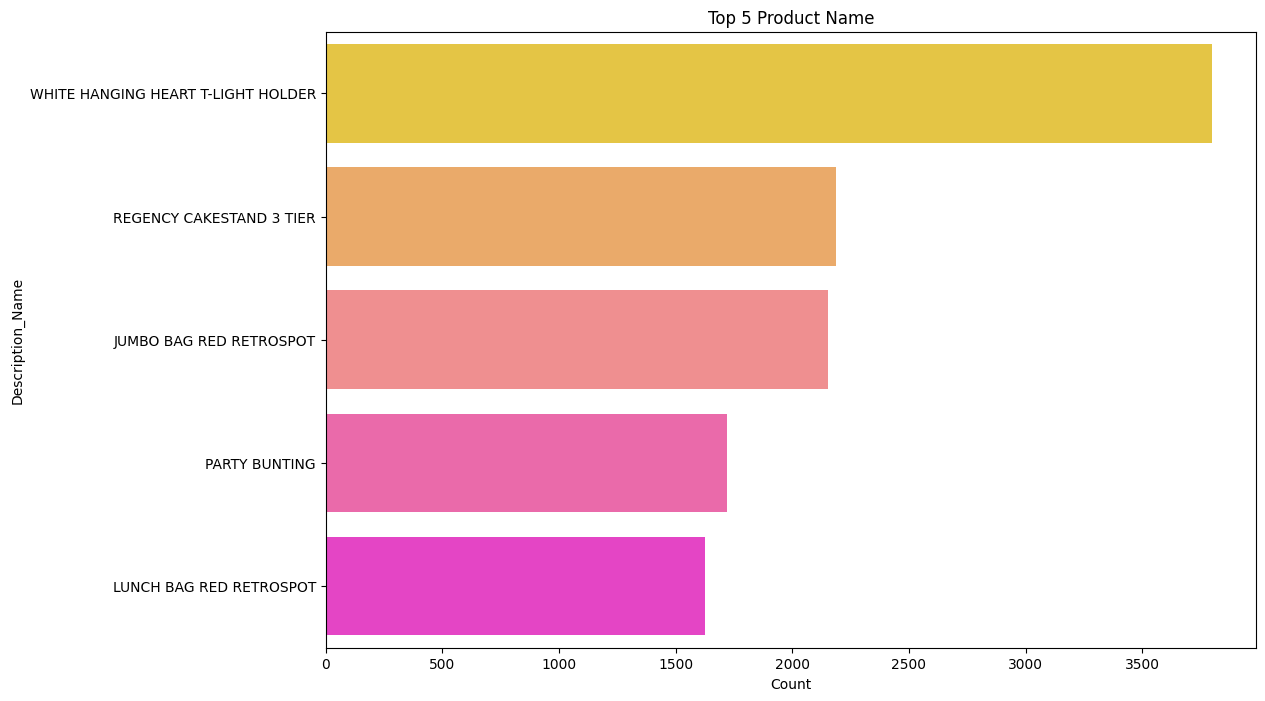

In [70]:
#plot top 5 product name
plt.figure(figsize=(12,8))
plt.title('Top 5 Product Name')
sns.barplot(x='Count',y='Description_Name',data=Description_df[:5], palette='spring_r');

In [71]:
#bottom 5 description name
Description_df.tail()

,Description_Name,Count
4213,LILY BROOCH WHITE/SILVER COLOUR,1
4214,on cargo order,1
4215,damages/dotcom?,1
4216,sold as set/6 by dotcom,1
4217,"PAPER CRAFT , LITTLE BIRDIE",1


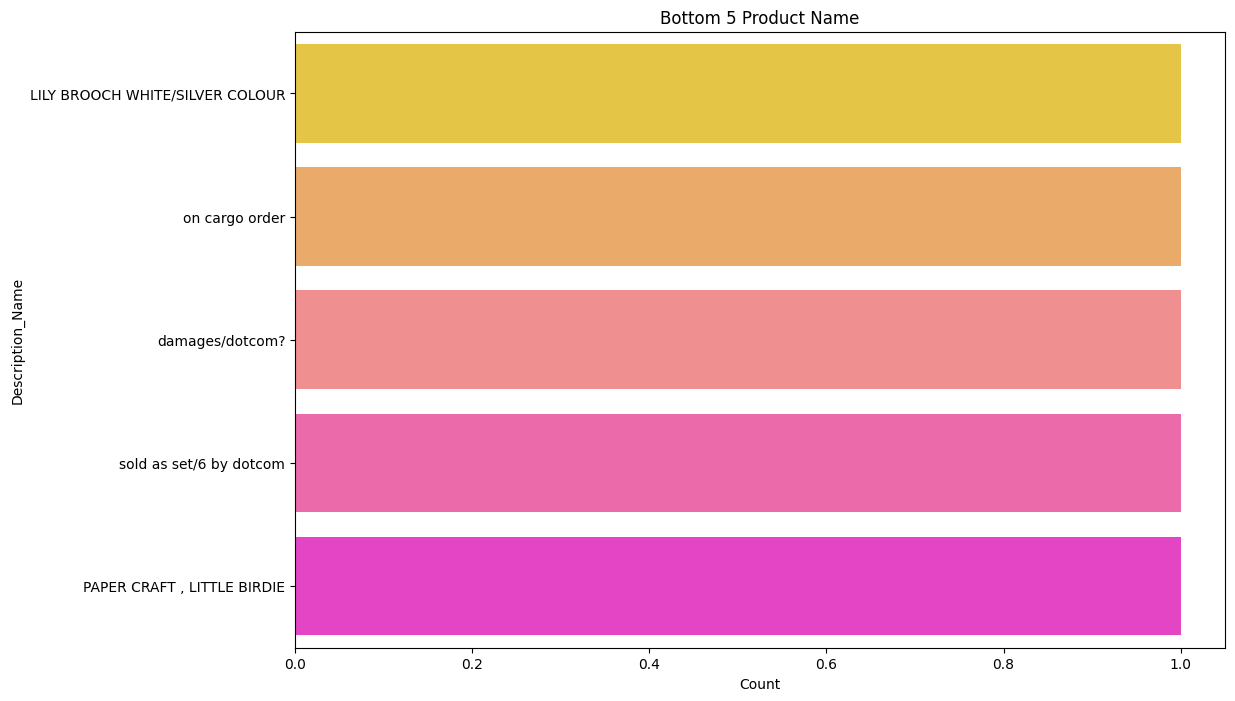

In [72]:
#plot bottom 5 product name
plt.figure(figsize=(12,8))
plt.title('Bottom 5 Product Name')
sns.barplot(x='Count',y='Description_Name',data=Description_df[-5:], palette='spring_r');

##### 1. Why did you pick the specific chart?

I have selected this chart to know which products are top buyied products and  which are bottom products 

##### 2. What is/are the insight(s) found from the chart?

**Top product based on maximum selling are :**

WHITE HANGING HEART T-LIGHT HOLDER,	REGENCY CAKESTAND 3 TIER	,
JUMBO BAG RED RETROSPOT	, PARTY BUNTING	,LUNCH BAG RED RETROSPOT	

**Bottom 5 Product based on the selling are:**

PC CUTLERY SET PANTRY DESIGN	,LILY BROOCH WHITE/SILVER COLOUR	, on cargo order	,damages/dotcom?	,PAPER CRAFT , LITTLE BIRDIE	

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can help create a positive business impact by providing information on the top-selling products, which can be leveraged to drive sales, marketing, and inventory strategies. The company can focus on promoting and stocking the top-selling products to meet customer demand and maximize revenue.

On the other hand, the insights on the bottom-selling products can help identify potential areas of improvement. The company can assess the reasons behind the low sales and evaluate whether it's due to product quality, lack of customer interest, or other factors. This information can guide decision-making processes such as product discontinuation, targeted marketing campaigns, or product enhancements to stimulate growth.

Overall, the gained insights can contribute to making informed business decisions and driving positive growth, both by capitalizing on successful products and addressing challenges associated with underperforming products.

#### Chart - 5

In [73]:
# Chart - 5 visualization code

In [74]:
df_cleaned.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,536014.0,8.743389,155.999010,-80995.00,1.00,3.00000,10.00,660.00
UnitPrice,536014.0,3.483838,22.616846,-11062.06,1.25,2.08000,4.13,293.08
CustomerID,536014.0,15282.805186,1482.806544,12346.00,14367.00,15287.69057,16241.00,18287.00


##### 1. Why did you pick the specific chart?

I have selected this graph to determine the average quantity of items ordered overall and the average unit price of each item.

##### 2. What is/are the insight(s) found from the chart?

The average quantity of items ordered overall is approximately 8, and the average unit price of each item is approximately 3.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The average quantity of items ordered overall being approximately 8 indicates that customers tend to purchase a reasonable quantity of items, which suggests a healthy level of demand. This insight can help businesses optimize their inventory management, pricing strategies, and promotional activities to meet customer expectations and maximize sales.

Similarly, the average unit price of each item being approximately 3 provides valuable information about the pricing structure. Businesses can use this insight to assess their pricing competitiveness in the market, adjust prices if necessary, and ensure they are offering products at a competitive price point to attract customers.

#### Chart - 6

In [75]:
# Chart - 6 visualization code

In [76]:
order_num = df_cleaned.groupby(['CustomerID'])[['InvoiceNo']].nunique().apply(display)

CustomerID
12346.0     1
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     3
18283.0    16
18287.0     3
Name: InvoiceNo, Length: 4359, dtype: int64

As we can see, there are 4339 total customers. Let's see the number of repeat customers i.e. those who made >1 order

In [77]:
mul_orders = pd.DataFrame(df_cleaned.groupby(['CustomerID'])[['InvoiceNo']].nunique())
mul_orders['InvoiceNo']=mul_orders['InvoiceNo'].astype(int)
mul_orders=mul_orders[mul_orders['InvoiceNo']>1]
len(mul_orders)

3043

As we can see, 3043 customers made a repeat purchase. That means, around 70% customers were retained.



##### 1. Why did you pick the specific chart?

 
I selected this specific chart to determine the number of repeat customers.



##### 2. What is/are the insight(s) found from the chart?

Upon analyzing the data, we can observe that out of the total 4339 customers, approximately 3043 of them made a repeat purchase. This indicates a customer retention rate of around 70%, suggesting a significant portion of customers were retained and made multiple purchases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The fact that around 70% of customers made a repeat purchase indicates a high level of customer loyalty and satisfaction. This insight suggests that the business has been successful in retaining customers and building long-term relationships.  

The insights on repeat customers can contribute to a positive business impact by highlighting the success of customer retention efforts. However, it is important to continuously monitor and address any potential negative growth factors to ensure sustained success and mitigate any risks that may impact the business's growth trajectory.

#### Chart - 7

In [78]:
# Chart - 7 visualization code

In [79]:
df_cleaned['InvoiceDate']=pd.to_datetime(df_cleaned['InvoiceDate'])
def get_month(x):
    return dt.datetime(x.year, x.month, 1)
  
# Create the invoicemonth period column
df_cleaned['InvoiceMonthYear'] = df_cleaned['InvoiceDate'].apply(get_month)
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonthYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [80]:
grouping = df_cleaned.groupby('CustomerID')['InvoiceMonthYear']
#finding and assigning earliest date of joining for each customer, here cohort refers to the time of joining
df_cleaned['CohortMonthYear'] = grouping.transform('min')
df_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonthYear,CohortMonthYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01


In [81]:

df_cleaned['InvoiceMonthYear']=pd.to_datetime(df_cleaned['InvoiceMonthYear'])
df_cleaned['CohortMonthYear']=pd.to_datetime(df_cleaned['CohortMonthYear'])

  
invoice_year, invoice_month = df_cleaned['InvoiceMonthYear'].dt.year,df_cleaned['InvoiceMonthYear'].dt.month
cohort_year, cohort_month = df_cleaned['CohortMonthYear'].dt.year,df_cleaned['CohortMonthYear'].dt.month
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
df_cleaned['MonthsRetained'] = years_diff * 12 + months_diff + 1
df_cleaned.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonthYear,CohortMonthYear,MonthsRetained
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


In [82]:
months_count = df_cleaned['MonthsRetained'].value_counts().sort_index()
months_count

1     132799
2      41973
3      34525
4      36666
5      32357
6      35386
7      32966
8      35863
9      31006
10     33156
11     31039
12     43110
13     15168
Name: MonthsRetained, dtype: int64

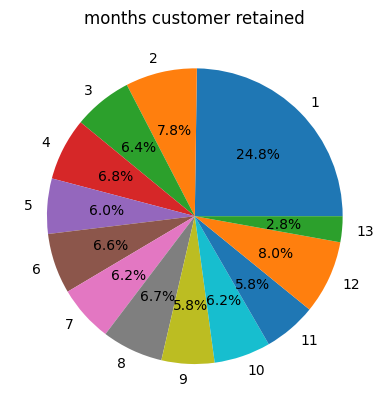

In [83]:
# create pie chart
plt.pie(months_count, labels=months_count.index, autopct='%1.1f%%')
plt.title("months customer retained")
plt.show()

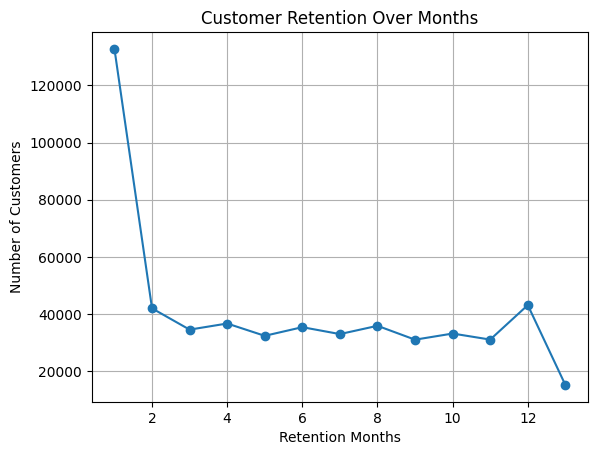

In [84]:
# Create the line graph
plt.plot(months_count.index, months_count.values, marker='o', linestyle='-')
plt.xlabel('Retention Months')
plt.ylabel('Number of Customers')
plt.title('Customer Retention Over Months')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

I have chosen this specific chart because it provides insights into the duration for which each customer has remained engaged with the company. While we have observed that customers are retaining, it is crucial to delve deeper and understand the specific length of time that customers have maintained their association with the company.

##### 2. What is/are the insight(s) found from the chart?

A significant portion of customers, approximately 28%, stayed with the company for only one month. However, as we progress to later months, the number of customers gradually decreases. This trend indicates a decline in customer retention over time. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights on customer retention and the declining customer numbers provide an opportunity for businesses to take action and create a positive impact. By focusing on improving customer retention, addressing pain points, and implementing effective strategies to enhance engagement and loyalty, businesses can mitigate negative growth risks and foster sustainable growth.

#### Chart - 8

In [85]:
# Chart - 8 visualization code

In [86]:
group = df_cleaned.groupby(['CohortMonthYear', 'MonthsRetained'])
cohorts = group['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_counts = cohorts.pivot(index='CohortMonthYear', columns='MonthsRetained', values='CustomerID')
cohort_sizes = cohort_counts.iloc[:,0]
retention_percent = cohort_counts.divide(cohort_sizes, axis=0)*10

In [87]:
month_list = retention_percent.reset_index()['CohortMonthYear']

def get_month_name(x):
   return dt.datetime.strftime(x, '%b-%y')
  
month_list = month_list.apply(get_month_name)

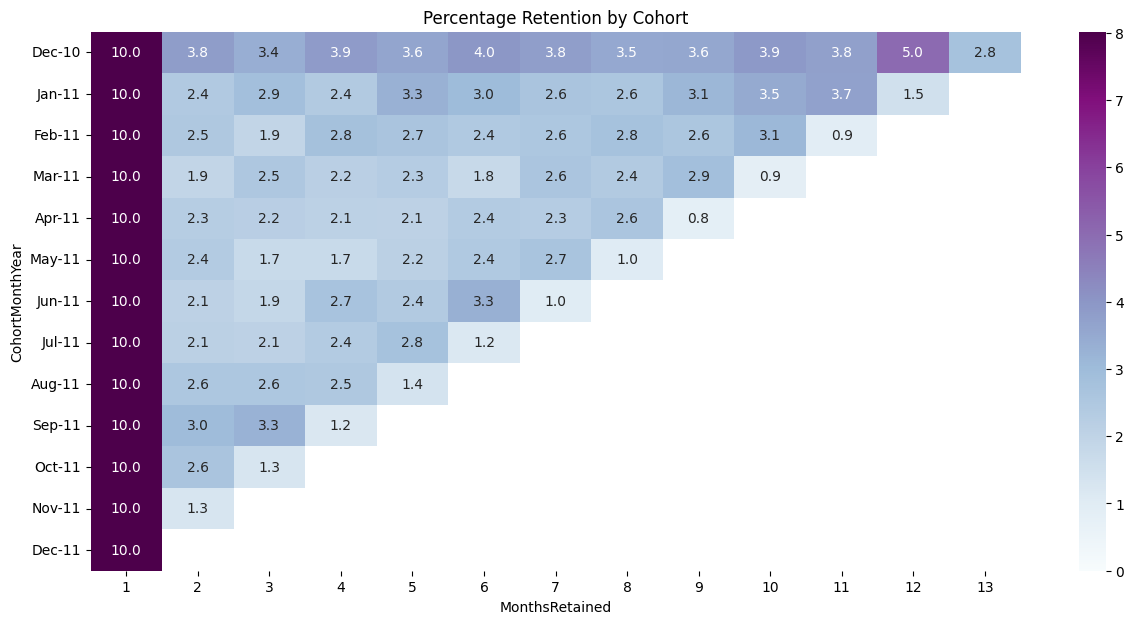

In [88]:
plt.figure(figsize=(15,7))
plt.title('Percentage Retention by Cohort')
sns.heatmap(data=retention_percent,annot = True,vmin = 0.0, cmap="BuPu",vmax = list(retention_percent.max().sort_values(ascending = False))[1]+3,fmt = '.1f',yticklabels=month_list)
plt.show()

##### 1. Why did you pick the specific chart?

 to check retention rate of customers cohortwise.

##### 2. What is/are the insight(s) found from the chart?

Based on the cohort analysis graph of Percentage Retention of cohorts, we deduce following observations:

1. Customers who purchased first time in the month of december 2010, there was significant decline in customers purchasing in the next 11 months but at the end of the year the customers came back to purchase the products in the store by a huge margin .

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

the gained insights can have a positive business impact by leveraging the observed patterns in customer behavior to inform targeted marketing strategies. By capitalizing on the holiday season and understanding the factors contributing to customer decline, businesses can enhance customer retention, drive sales, and mitigate negative growth risks.

#### Chart - 9

In [89]:
# Chart - 9 visualization code

In [90]:
# Assuming you have a DataFrame called 'df_cleaned' with a 'UnitPrice' column

# Calculate the average unit price
average_unit_price = df_cleaned['UnitPrice'].mean()

# Create the discount column based on the unit price
df_cleaned['Discount'] = df_cleaned['UnitPrice'] < average_unit_price

# Print the updated DataFrame
df_cleaned


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonthYear,CohortMonthYear,MonthsRetained,Discount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1,True
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,True
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1,True
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,True
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01,5,True
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,5,True
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5,False
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5,False


In [91]:


# Assuming you have a DataFrame called 'df_cleaned with a 'Month' column representing the months and a 'Discount' column indicating whether a discount was given or not

# Group the data by month and check the presence of discounts
discounts_by_month = df_cleaned.groupby('MonthsRetained')['Discount'].sum()

# Create a new DataFrame to hold the results
discounts_df = pd.DataFrame({'MonthsRetained': discounts_by_month.index, 'Discounts Given': discounts_by_month.values})

# Print the discounts by month
print(discounts_df)


    MonthsRetained  Discounts Given
0                1            92967
1                2            29505
2                3            23463
3                4            24973
4                5            23086
5                6            24426
6                7            22788
7                8            25763
8                9            21950
9               10            22690
10              11            21182
11              12            28777
12              13             9807


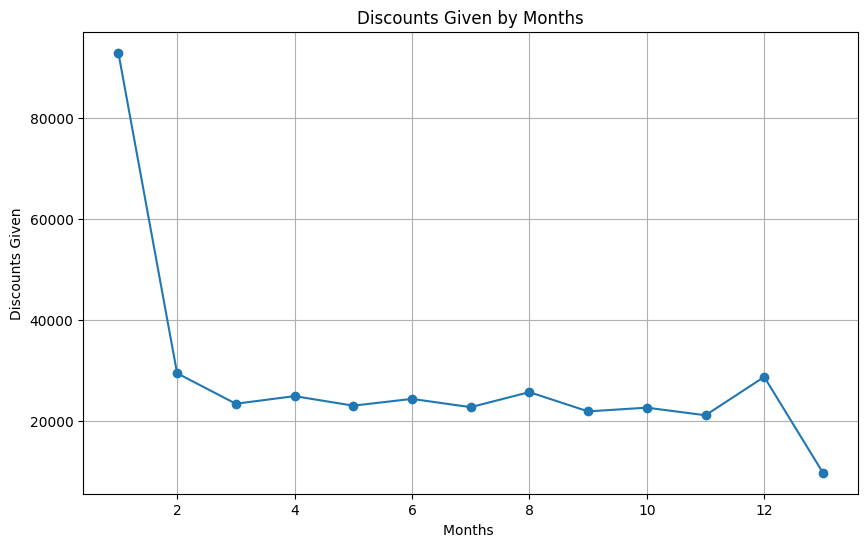

In [92]:


# Assuming you have a DataFrame called 'discounts_df' with 'MonthsRetained' and 'Discounts Given' columns

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(discounts_df['MonthsRetained'], discounts_df['Discounts Given'], marker='o')
plt.xlabel('Months ')
plt.ylabel('Discounts Given')
plt.title('Discounts Given by Months')
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?


As observed, the retention rate is higher in the first month, which could be attributed to sales and discounts. To further analyze the impact of discounts, I have chosen to plot a graph showcasing the distribution of discounts given across different months.

##### 2. What is/are the insight(s) found from the chart?

The graph displays the number of discounts given in each month, providing insights that in 1st month  discounts were more prevalent.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This information can help identify patterns and trends in discount offerings, allowing businesses to optimize their marketing and sales strategies accordingly. By understanding the months with higher discount activity, businesses can plan targeted promotional campaigns and leverage discounts as a means to attract and retain customers, potentially leading to increased sales and customer loyalty.

#### Chart - 10

In [93]:
# Chart - 10 visualization code

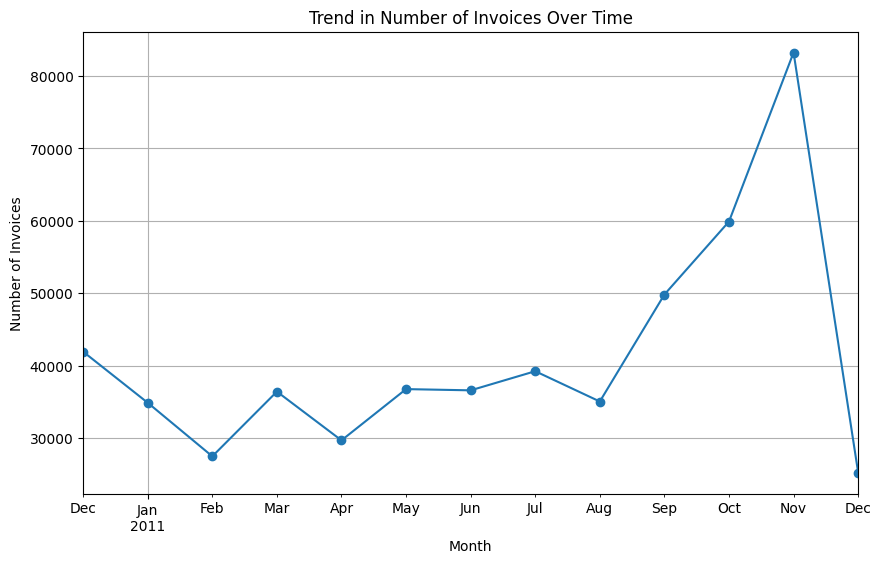

In [94]:
# Convert the 'InvoiceDate' column to datetime type
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Group the data by month and count the number of invoices
invoices_by_month = df_cleaned.groupby(df_cleaned['InvoiceDate'].dt.to_period('M')).size()

# Plot the graph
plt.figure(figsize=(10, 6))
invoices_by_month.plot(marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Invoices')
plt.title('Trend in Number of Invoices Over Time')
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

To analyze the overall trend in the number of invoices over time and identify any seasonal patterns or significant changes in invoice frequency

##### 2. What is/are the insight(s) found from the chart?

The analysis of the number of invoices over time reveals fluctuations throughout the year, indicating both ups and downs in the invoice frequency. Additionally, a clear seasonal pattern emerges, with the highest number of invoices observed in November. This suggests a potential peak in sales or business activity during that month.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights regarding the fluctuations in the number of invoices over time and the seasonal pattern can potentially help create a positive business impact. By understanding the ups and downs in invoice frequency and identifying the peak sales period in November, businesses can strategically plan their operations, marketing campaigns, and inventory management to optimize their sales during the high-demand season. This can lead to increased revenue and profitability.

However, there might be insights that could lead to negative growth if not properly addressed

#### Chart - 11

In [95]:
# Chart - 11 visualization code

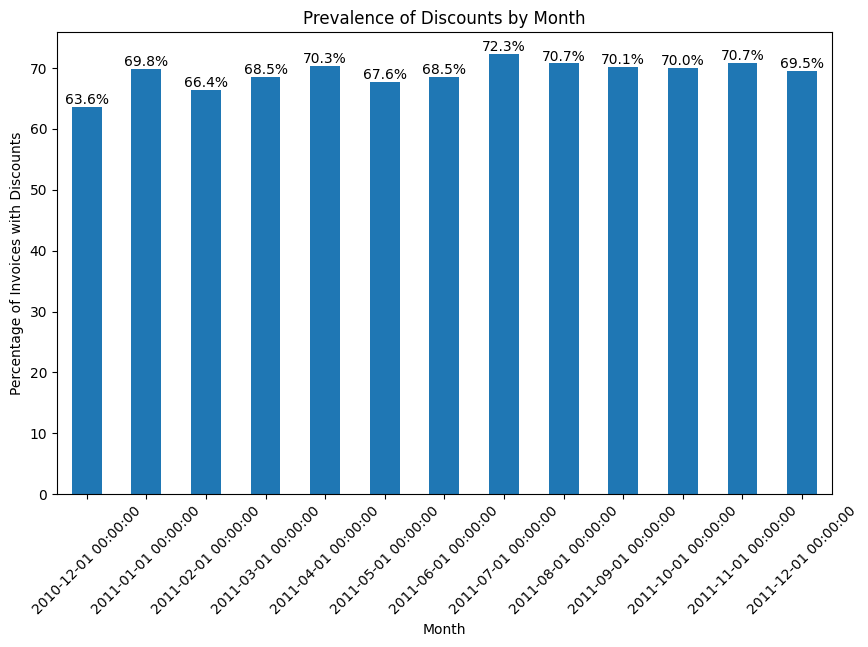

In [96]:
# Group the data by month and calculate the percentage of invoices with discounts
discounts_by_month = df_cleaned.groupby('InvoiceMonthYear')['Discount'].mean() * 100

# Plot the discounts by month
plt.figure(figsize=(10, 6))
discounts_by_month.plot(kind='bar')

# Add percentage values to the plot
for i, v in enumerate(discounts_by_month):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.xlabel('Month')
plt.ylabel('Percentage of Invoices with Discounts')
plt.title('Prevalence of Discounts by Month')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

 to check are there any specific months or periods where discounts are more prevalent?  and How do discounts affect customer behavior and sales volume? 

##### 2. What is/are the insight(s) found from the chart?

The summary statistics for discounted invoices show that:

1. The average number of unique invoices for customers who received discounts is approximately 5.41.
2. The average total invoice amount for discounted invoices is around 1246.32.
3. The minimum total invoice amount is negative (-168466.70), indicating potential refunds or credits given for the discounted invoices.


Similarly, for non-discounted invoices, the summary statistics show that:

1. The average number of unique invoices for customers who did not receive discounts is approximately 4.68.
2. The average total invoice amount for non-discounted invoices is around 980.44.
The minimum total invoice amount is negative (-4522.50), indicating potential refunds or credits given for non-discounted invoices.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from analyzing discounted and non-discounted invoices can have a positive impact on business: Understanding customer behavior and Tailoring strategies.

However, there are potential negative impacts to consider: Variability in invoice amounts,
Negative minimum invoice amounts,
To mitigate negative impacts, businesses should address customer concerns, improve product offerings, and evaluate the effectiveness and profitability of discount programs regularly.








#### Chart - 12

In [97]:
# Chart - 12 visualization code

In [98]:
# Calculate purchase frequency by cohort month-year
purchase_frequency = df_cleaned.groupby(['CohortMonthYear', 'CustomerID'])['InvoiceNo'].nunique().reset_index()

# Calculate average purchase frequency by cohort month-year
average_purchase_frequency = purchase_frequency.groupby('CohortMonthYear')['InvoiceNo'].mean()

# Sort the average purchase frequency in descending order
average_purchase_frequency_sorted = average_purchase_frequency.sort_values(ascending=False)

df_cleaned['CohortMonthYear'] = df_cleaned['InvoiceDate'].dt.to_period('M')



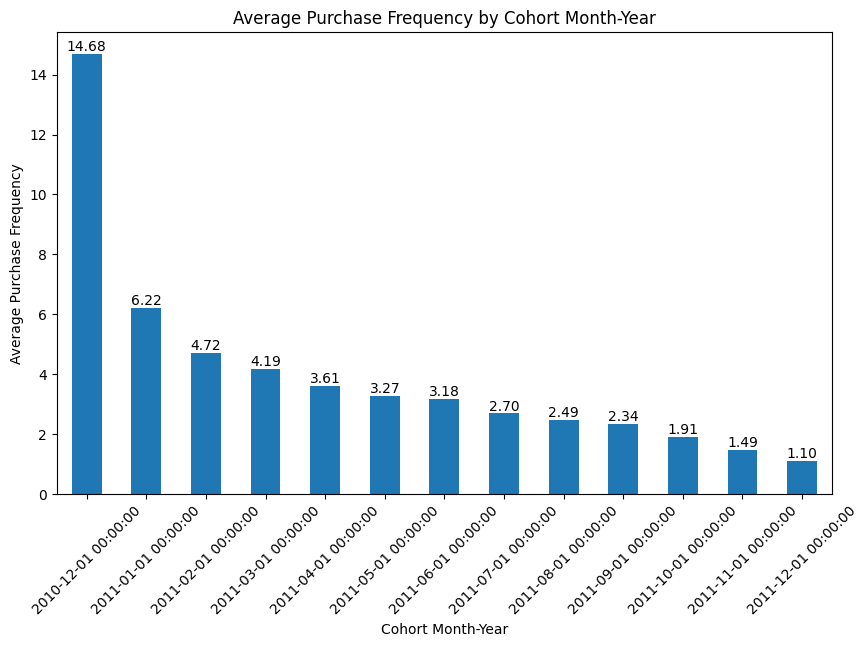

In [99]:
plt.figure(figsize=(10, 6))
average_purchase_frequency_sorted.plot(kind='bar')

# Annotate each bar with its corresponding value
for i, v in enumerate(average_purchase_frequency_sorted):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')

plt.xlabel('Cohort Month-Year')
plt.ylabel('Average Purchase Frequency')
plt.title('Average Purchase Frequency by Cohort Month-Year')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

 to check What is the average purchase frequency for customers based on their cohort month-yearand  Are there any specific cohorts that show higher or lower purchase frequency.

##### 2. What is/are the insight(s) found from the chart?

The graph displays the average purchase frequency for customers based on their cohort month-year, with the corresponding values annotated on each bar. Notably, the cohort '2010-12' demonstrates a higher purchase frequency, while the cohort '2011-12' exhibits a comparatively lower purchase frequency.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 the insights gained from analyzing the purchase frequency by cohort month-year can inform businesses' decision-making processes and guide them towards actions that have the potential to generate positive business impact while addressing any negative growth areas.

#### Chart - 13

In [100]:
# Chart - 13 visualization code

In [101]:
# Calculate the total revenue by multiplying quantity and unit price
df_cleaned['TotalRevenue'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Group the data by stock code and description and calculate the average unit price and total revenue
stock_price_revenue = df_cleaned.groupby(['StockCode', 'Description']).agg({'UnitPrice': 'mean', 'TotalRevenue': 'sum'})

# Sort the data by average unit price in descending order
stock_price_revenue_sorted = stock_price_revenue.sort_values(by='UnitPrice', ascending=False)

# Print the top 5 stock codes and descriptions with highest unit prices
top_high_price_items = stock_price_revenue_sorted.head(5)
print("Top 5 Stock Codes and Descriptions with Highest Unit Prices:")
print(top_high_price_items)

# Calculate the contribution of high-priced items to overall revenue
high_price_items_contribution = top_high_price_items['TotalRevenue'].sum() / df_cleaned['TotalRevenue'].sum() * 100
print("\nContribution of High-Priced Items to Overall Revenue: {:.2f}%".format(high_price_items_contribution))


Top 5 Stock Codes and Descriptions with Highest Unit Prices:
                                               UnitPrice  TotalRevenue
StockCode Description                                                 
22828     REGENCY MIRROR WITH SHUTTERS        156.428571       1530.00
DOT       DOTCOM POSTAGE                      156.310163      86120.32
22827     RUSTIC  SEVENTEEN DRAWER SIDEBOARD  156.034483       5000.00
AMAZONFEE AMAZON FEE                          146.840000         -1.00
22655     VINTAGE RED KITCHEN CABINET         124.756410       5509.50

Contribution of High-Priced Items to Overall Revenue: 1.05%


##### 1. Why did you pick the specific chart?

 to check are there any specific stock codes or descriptions that are associated with higher unit prices and  Do these high-priced items contribute significantly to the overall revenue?

##### 2. What is/are the insight(s) found from the chart?

 1. specific  descriptions that are associated with higher unit prices are 
  
REGENCY MIRROR WITH SHUTTERS        
DOTCOM POSTAGE                          
RUSTIC  SEVENTEEN DRAWER SIDEBOARD       
AMAZON FEE                           
VINTAGE RED KITCHEN CABINET  

2. Contribution of High-Priced Items to Overall Revenue: 1.05%

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


The specific descriptions associated with higher unit prices are "REGENCY MIRROR WITH SHUTTERS," "DOTCOM POSTAGE," "RUSTIC SEVENTEEN DRAWER SIDEBOARD," "AMAZON FEE," and "VINTAGE RED KITCHEN CABINET." However, these high-priced items contribute only 1.05% to the overall revenue. While they may attract niche customers and enhance brand perception, their limited sales volume could lead to a narrower customer base and less revenue diversification. A comprehensive analysis is necessary to determine their specific impact on business growth.

#### Chart - 14 - Correlation Heatmap

In [102]:
# Correlation Heatmap visualization code

<Axes: >

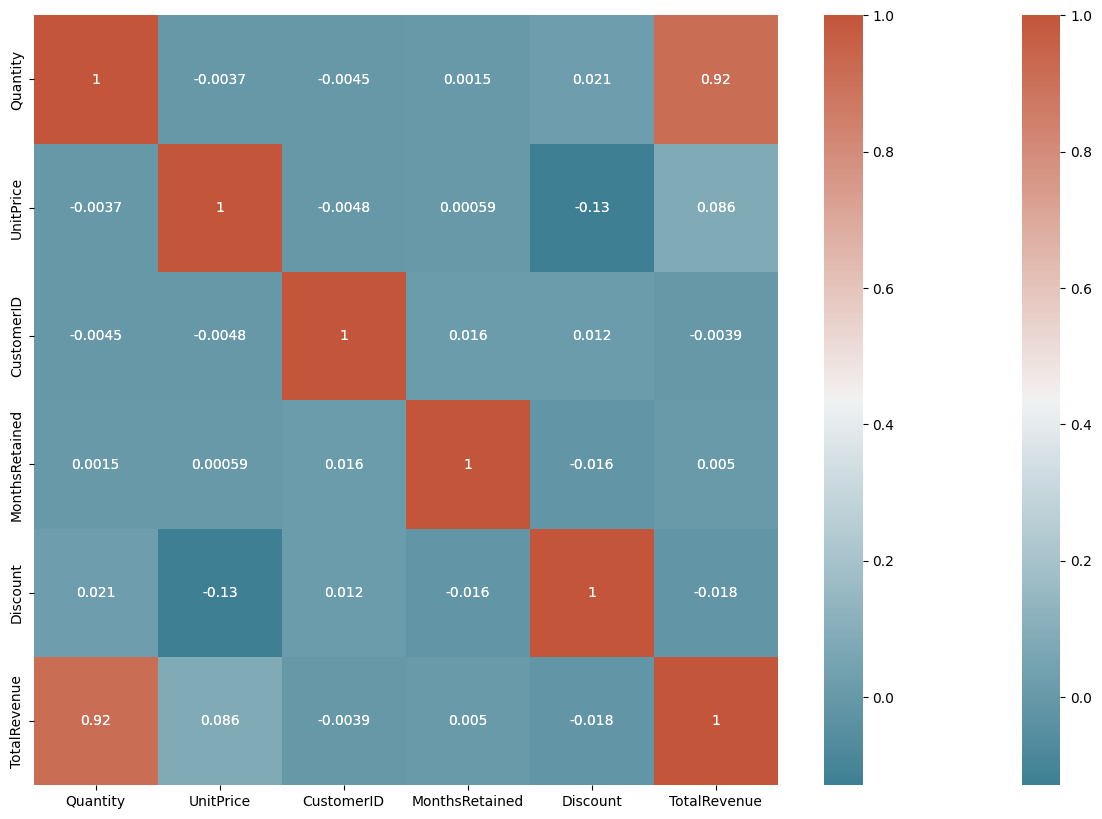

In [103]:
corr = df_cleaned.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

##### 1. Why did you pick the specific chart?

I have picked up this chart because correlation heatmap visualize the strength of relationships between numerical variables.

##### 2. What is/are the insight(s) found from the chart?

We can see that following have strong correlation :
1. InvoiceTotal and Quantity
2. InvoiceTotal and UnitPrice 
3. Discount and Quantity 
4. Discount and CustomerID
5. MonthsRetained and CustomerID


#### Chart - 15 - Pair Plot 

In [104]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

# Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts.

A cohort is a group of subjects who share a defining characteristic. We can observe how a cohort behaves across time and compare it to other cohorts.

Types of cohorts:
* Time Cohorts:
They are customers who signed up for a product or service during a particular time frame. Analyzing these cohorts shows the customers’ behavior depending on the time they started using the company’s products or services. The time may be monthly or quarterly even daily.

* Behaviour Cohorts:
They are customers who purchased a product or subscribed to a service in the past. It groups customers by the type of product or service they signed up. Customers who signed up for basic level services might have different needs than those who signed up for advanced services. Understaning the needs of the various cohorts can help a company design custom-made services or products for particular segments.

* Size Cohorts:
Size cohorts refer to the various sizes of customers who purchase company’s products or services. This categorization can be based on the amount of spending in some periodic time after acquisition or the product type that the customer spent most of their order amount in some period of time.

For cohort analysis, there are a few labels that we have to create:

Invoice period - A string representation of the year and month of a single transaction/invoice. Cohort group - A string representation of the the year and month of a customer’s first purchase. This label is common across all invoices for a particular customer. Cohort period/Index-  A integer representation a customer’s stage in its “lifetime”. The number represents the number of months passed since the first purchase.

In [105]:
cohort =df_cleaned.copy()
cohort

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonthYear,CohortMonthYear,MonthsRetained,Discount,TotalRevenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12,1,True,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12,1,True,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12,1,True,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12,1,True,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12,1,True,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-12,5,True,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-12,5,True,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-12,5,False,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-12,5,False,16.60


In [106]:
# Define a function that will parse the date
import datetime
def get_month(x):
    return datetime.datetime(x.year,x.month,1) 

# Create InvoiceMonth column
cohort['InvoiceMonth'] = cohort['InvoiceDate'].apply(get_month) 

# Group by CustomerID and select the InvoiceMonth value
grouping = cohort.groupby('CustomerID')['InvoiceMonth']

# Assign a minimum InvoiceMonth value to the dataset
cohort['CohortMonth'] = grouping.transform('min')

Calculate time offset in months
Calculating time offset for each transaction allows you to report the metrics for each cohort in a comparable fashion.

First, we will create some variables that capture the integer value of years and months for Invoice and Cohort Date using the get_date_int() function

In [107]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

# Get the integers for date parts from the `InvoiceMonth` column
invoice_year, invoice_month = get_date_int(cohort,'InvoiceMonth')

# Get the integers for date parts from the `CohortMonth` column
cohort_year, cohort_month = get_date_int(cohort,'CohortMonth')

In [108]:
print ("Unique terms for Cohort Year is {} " .format(cohort_year.unique()))
print ("Unique terms for Cohort Month is {} " .format(cohort_month.unique()))
print ("Unique terms for Invoice Year is {} " .format(invoice_year.unique()))
print ("Unique terms for Invoice Year is {} " .format(invoice_month.unique()))

Unique terms for Cohort Year is [2010 2011] 
Unique terms for Cohort Month is [12  1  2  3  4  5  6  7  8  9 10 11] 
Unique terms for Invoice Year is [2010 2011] 
Unique terms for Invoice Year is [12  1  2  3  4  5  6  7  8  9 10 11] 


In [109]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Extract the difference in months from all previous values
cohort['CohortIndex'] = years_diff * 12 + months_diff + 1

In [110]:
#THis Cohort Index will give us an idea on the time difference in months between the customer's first purchase and the customer's current purchase
cohort['CohortIndex'].unique()
cohort

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonthYear,CohortMonthYear,MonthsRetained,Discount,TotalRevenue,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12,1,True,15.30,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12,1,True,20.34,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12,1,True,22.00,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12,1,True,20.34,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12,1,True,20.34,2010-12-01,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-12,5,True,10.20,2011-12-01,2011-08-01,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-12,5,True,12.60,2011-12-01,2011-08-01,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-12,5,False,16.60,2011-12-01,2011-08-01,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-12,5,False,16.60,2011-12-01,2011-08-01,5


Calculate retention rate Customer retention is a very useful metric to understand how many of all the customers are still active. It gives you the percentage of active customers compared to the total number of customers

In [111]:
grouping = cohort.groupby(['CohortMonth', 'CohortIndex'])

In [112]:
# Count the number of unique values per customer ID
#cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

# Create a pivot 
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)*100
#print (cohort[cohort['CohortMonth']=='2011-12-01']['CustomerID'].nunique()) #Verifies 41 against this month
#cohort_sizes
retention.index = retention.index.date

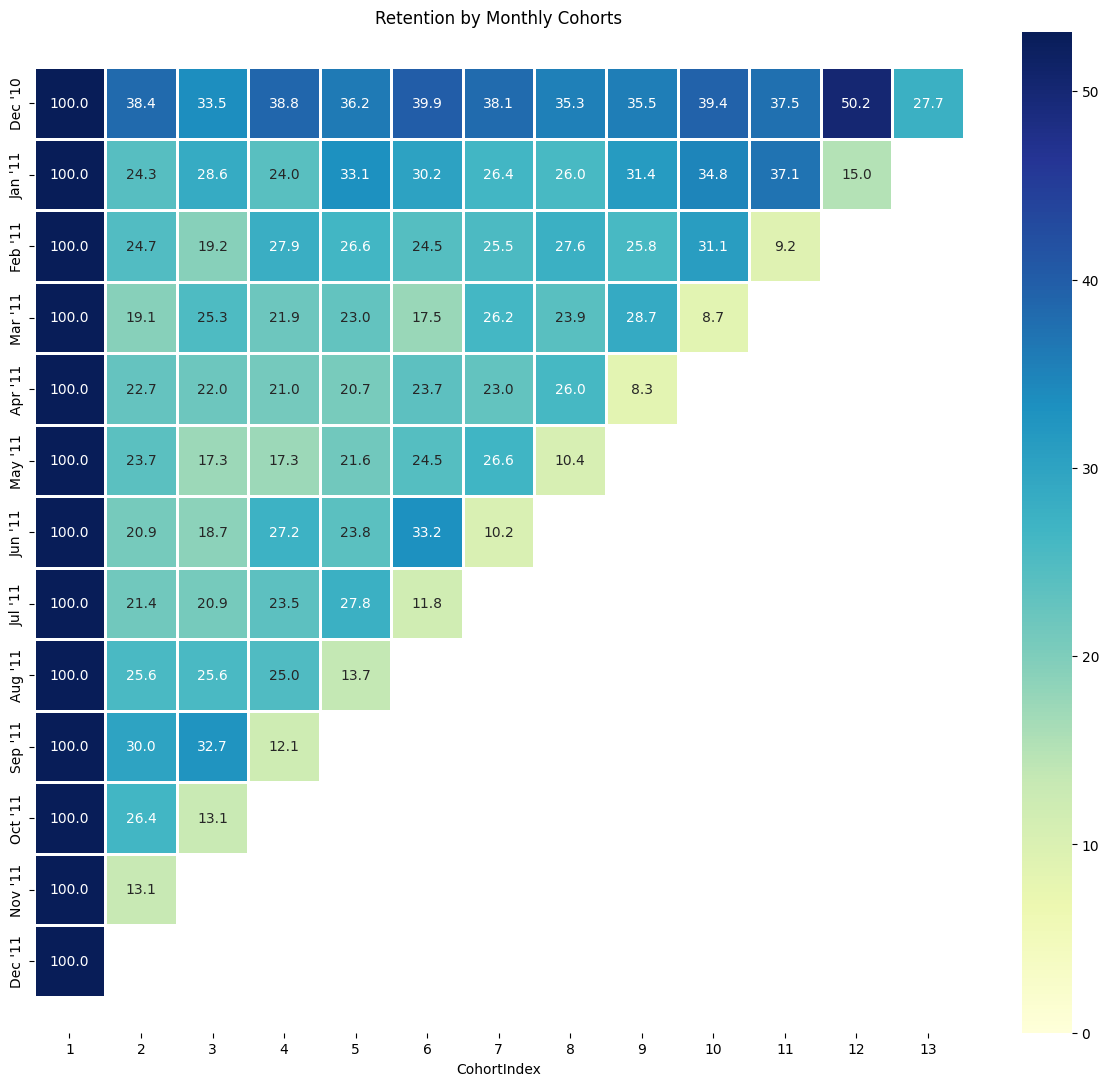

<Figure size 640x480 with 0 Axes>

In [113]:
month_list = ["Dec '10", "Jan '11", "Feb '11", "Mar '11", "Apr '11",\
              "May '11", "Jun '11", "Jul '11", "Aug '11", "Sep '11", \
              "Oct '11", "Nov '11", "Dec '11"]

# Initialize inches plot figure
plt.figure(figsize=(15,13))

# Add a title
plt.title('Retention by Monthly Cohorts')

# Create the heatmap
ax = sns.heatmap(data=retention,
            annot = True,
            cmap = "YlGnBu",
            vmin = 0.0,
            vmax = list(retention.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.9,
            yticklabels=month_list)

# plot of the data
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
fig = plt.figure()
plt.show();

Calculate average price per cohort Now we will calculate the average price metric and analyze if there are any differences in shopping patterns across time and across cohorts

In [114]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = cohort.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the unit price column
cohort_data = grouping['UnitPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='UnitPrice')
#average_price.round(1)
#average_price.index = average_price.index.date
average_price
#cohort_data
#cohort

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,3.923310,3.758325,4.492956,4.350160,3.923725,4.318793,4.147485,3.628705,2.716934,3.719513,3.903400,3.521834,3.731752
2011-01-01,3.244199,3.648054,3.068186,3.455410,3.156861,3.169255,2.917415,2.748003,2.638914,3.114180,2.884404,2.635897,NaN
2011-02-01,3.217320,3.965740,2.883433,3.151258,2.989982,2.793917,2.813782,2.894904,2.895615,2.947465,3.222725,NaN,NaN
2011-03-01,3.253060,3.450395,3.391083,3.289768,2.888839,2.759536,2.843991,2.811252,2.709221,2.468073,NaN,NaN,NaN
2011-04-01,3.348885,3.754121,3.300128,2.673439,3.028297,2.867185,2.902668,2.812492,2.636564,NaN,NaN,NaN,NaN
2011-05-01,3.227998,3.243691,2.655301,3.167391,2.667158,2.495751,2.615408,2.561021,NaN,NaN,NaN,NaN,NaN
2011-06-01,3.158584,2.611819,3.343994,2.837667,2.554844,2.761646,2.293928,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,2.918775,3.480495,2.752121,2.701985,2.403989,2.366635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,3.029019,3.789731,3.727033,3.961434,3.855493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


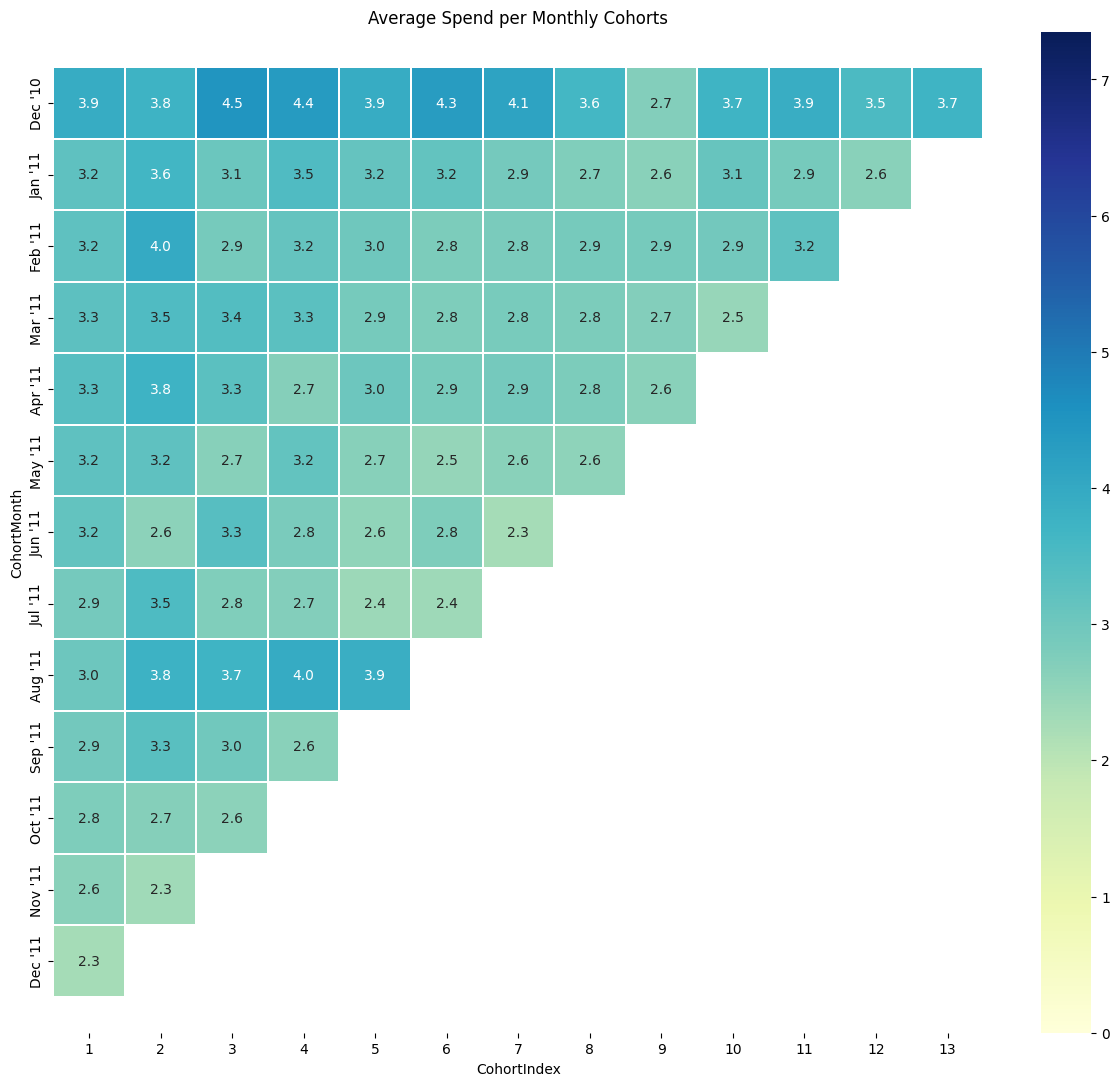

In [115]:
# Initialize plot figure
plt.figure(figsize=(15, 13))

plt.title('Average Spend per Monthly Cohorts')
# Create the heatmap
ax = sns.heatmap(data = average_price,
            annot=True,
            vmin = 0.0,
#             vmax =20,
            cmap='YlGnBu',
            vmax = list(average_price.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show();

Calculate average quantity per cohort
Now we will calculate the average quantity metric and analyze if there are any differences in shopping patterns across time and across cohorts.

In [116]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = cohort.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the Quantity column
cohort_data = grouping['Quantity'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_quantity = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity')
average_quantity.round(1)
average_quantity.index = average_quantity.index.date

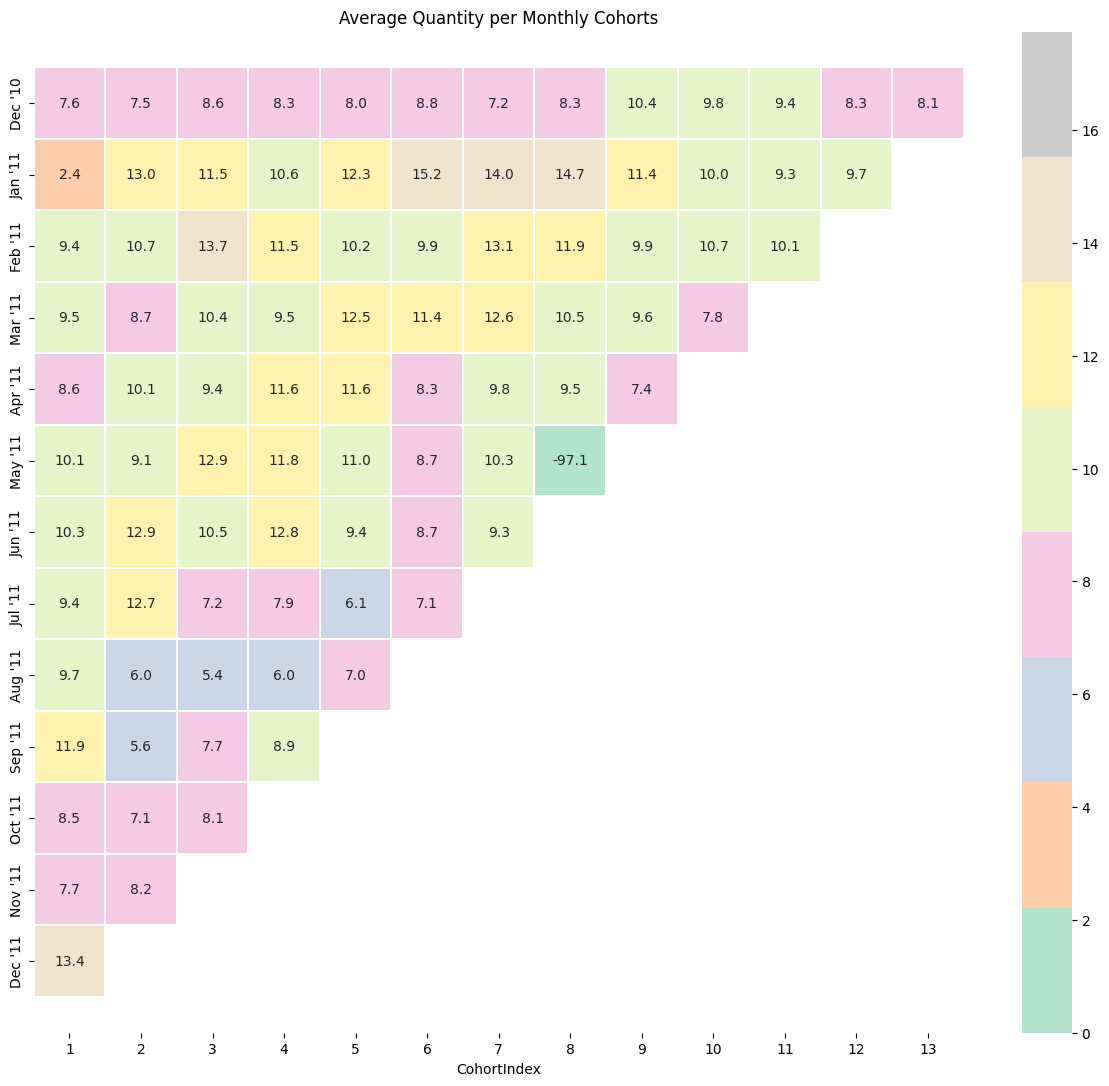

In [117]:
# Initialize plot figure
plt.figure(figsize=(15, 13))

# Add a title
plt.title('Average Quantity per Monthly Cohorts')

# Create the heatmap
ax  = sns.heatmap(data = average_quantity,
            annot=True,
            vmin = 0.0,
            cmap='Pastel2',
            vmax = list(average_quantity.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show();

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

"Is there a significant difference in the average InvoiceTotal between customers who received a discount and customers who did not receive a discount?

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


Research Hypothesis:

Null Hypothesis (H0): There is no significant difference in the average InvoiceTotal between customers who received a discount and customers who did not receive a discount.


Alternative Hypothesis (HA): There is a significant difference in the average InvoiceTotal between customers who received a discount and customers who did not receive a discount.

#### 2. Perform an appropriate statistical test.

In [118]:
# Perform Statistical Test to obtain P-Value

In [119]:
# Calculate the invoice total by multiplying quantity and unit price
df_cleaned['InvoiceTotal'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Separate InvoiceTotal for discounted and non-discounted customers
invoice_total_discounted = df_cleaned[df_cleaned['Discount'] > 0]['InvoiceTotal']
invoice_total_non_discounted = df_cleaned[df_cleaned['Discount'] == 0]['InvoiceTotal']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(invoice_total_discounted, invoice_total_non_discounted)

# Print the t-statistic and p-value
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: -12.97083815733359
P-value: 1.8146906182429602e-38


##### Which statistical test have you done to obtain P-Value?

used The t-statistic

##### Why did you choose the specific statistical test?

The t-statistic is a measure of the difference between the means of two groups, in this case, customers who received a discount and customers who did not receive a discount. The t-statistic value of -12.97 indicates a significant difference in the average InvoiceTotal between the two groups.

The p-value is a measure of the strength of evidence against the null hypothesis. In this case, the p-value is very small (1.81), which is less than the commonly used significance level of 0.05. This indicates strong evidence to reject the null hypothesis.

Therefore, based on the obtained results, we can conclude that there is a significant difference in the average InvoiceTotal between customers who received a discount and customers who did not receive a discount.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the average revenue generated by customers in different cohorts.

Alternate Hypothesis (HA): There is a significant difference in the average revenue generated by customers in different cohorts.

#### 2. Perform an appropriate statistical test.

In [120]:
# Perform Statistical Test to obtain P-Value

In [121]:
# Group the data by cohort month-year and calculate the total revenue
cohort_revenue = df_cleaned.groupby('CohortMonthYear')['InvoiceTotal'].sum()

# Perform one-way ANOVA to compare the average revenue between cohorts
import scipy.stats as stats
cohorts = df_cleaned['CohortMonthYear'].unique()
groups = [df_cleaned[df_cleaned['CohortMonthYear'] == cohort]['InvoiceTotal'] for cohort in cohorts]
fvalue, pvalue = stats.f_oneway(*groups)

# Print the test results
print("F-value:", fvalue)
print("P-value:", pvalue)


F-value: 3.336518752791804
P-value: 7.089623042529837e-05


##### Which statistical test have you done to obtain P-Value?

used F-value.

##### Why did you choose the specific statistical test?

The F-value represents the variation between the means of different cohorts.

The obtained F-value of 3.34 and the corresponding p-value of 7.09e-05 indicate that there is a significant difference in the average revenue generated by customers in different cohorts. Therefore, we reject the null hypothesis and conclude that there is evidence to support the alternate hypothesis, suggesting that there is a significant difference in the average revenue between cohorts.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the average InvoiceTotal between different quantities of items ordered.

Alternate Hypothesis (HA): There is a significant difference in the average InvoiceTotal between different quantities of items ordered.

#### 2. Perform an appropriate statistical test.

In [122]:
# Perform Statistical Test to obtain P-Value

In [123]:
# Separate InvoiceTotal for different quantities of items ordered
invoice_total_quantity_low = df_cleaned[df_cleaned['Quantity'] < 10]['InvoiceTotal']
invoice_total_quantity_high = df_cleaned[df_cleaned['Quantity'] >= 10]['InvoiceTotal']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(invoice_total_quantity_low, invoice_total_quantity_high)

# Print the t-statistic and p-value
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: -40.64339999543683
P-value: 0.0


##### Which statistical test have you done to obtain P-Value?


T-statistic test is used


##### Why did you choose the specific statistical test?

 The t-statistic is chosen for hypothesis testing when comparing the means of two groups. 
 
 A t-statistic of -40.64 indicates a significant difference in the average InvoiceTotal between different quantities of items ordered. The p-value of 0.0 further supports this finding. The p-value being very close to zero suggests strong evidence against the null hypothesis, indicating that the observed difference in average InvoiceTotal is unlikely due to chance. Therefore, we reject the null hypothesis and conclude that there is a significant difference in the average InvoiceTotal between different quantities of items ordered.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [124]:
# Handling Missing Values & Missing Value Imputation

In [125]:
df_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonthYear,CohortMonthYear,MonthsRetained,Discount,TotalRevenue,InvoiceTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12,1,True,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12,1,True,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12,1,True,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12,1,True,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12,1,True,20.34,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-12,5,True,10.20,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-12,5,True,12.60,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-12,5,False,16.60,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-12,5,False,16.60,16.60


In [126]:
df_cleaned.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
InvoiceMonthYear    0
CohortMonthYear     0
MonthsRetained      0
Discount            0
TotalRevenue        0
InvoiceTotal        0
dtype: int64

In [127]:
df_cleaned.dropna(inplace=True)

In [128]:
df_cleaned[df_cleaned.duplicated()].sum()

InvoiceNo         0.0
StockCode         0.0
Description       0.0
Quantity          0.0
UnitPrice         0.0
CustomerID        0.0
Country           0.0
MonthsRetained    0.0
Discount          0.0
TotalRevenue      0.0
InvoiceTotal      0.0
dtype: float64

In [129]:
df_cleaned.drop_duplicates(inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

### 2. Handling Outliers

In [130]:
# Handling Outliers & Outlier treatments

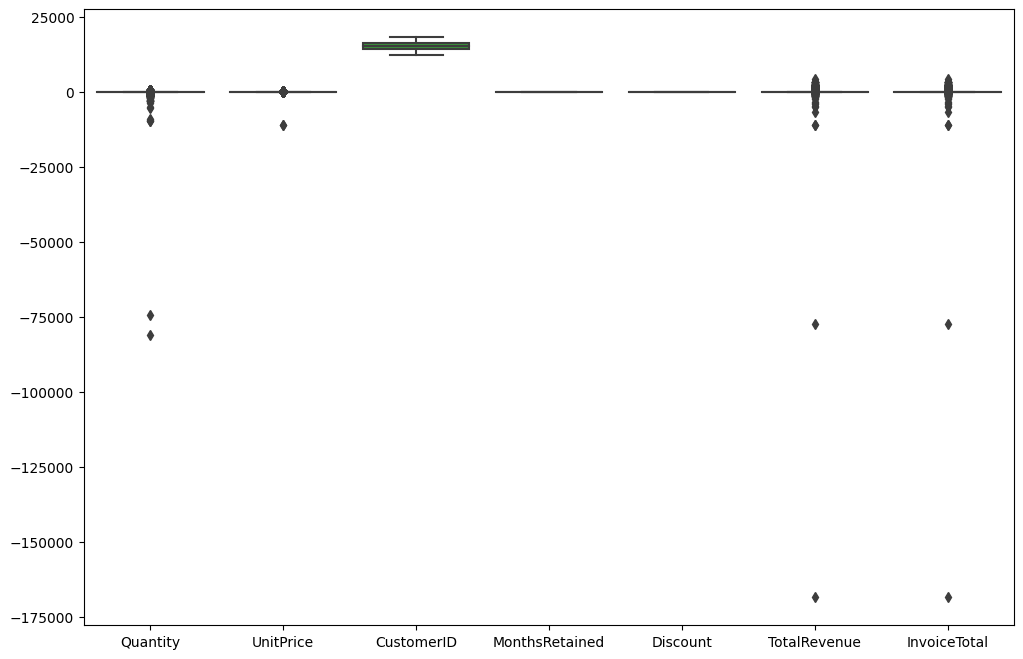

In [131]:
plt.figure(figsize=(12, 8))  
sns.boxplot(data=df_cleaned)

plt.show()

here we dont need to handle outlier because we are dealing with textual columns.

##### What all outlier treatment techniques have you used and why did you use those techniques?

### 3. Categorical Encoding

In [132]:
# Encode your categorical columns

no need

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [133]:
# Expand Contraction

In [134]:
df_cleaned.sample(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonthYear,CohortMonthYear,MonthsRetained,Discount,TotalRevenue,InvoiceTotal
507503,579187,21880,RED RETROSPOT TAPE,2,2011-11-28 15:31:00,0.42,15287.69057,United Kingdom,2011-11-01,2011-11,12,True,0.84,0.84
7996,537081,22273,FELTCRAFT DOLL MOLLY,12,2010-12-05 12:00:00,2.95,15332.00000,Lithuania,2010-12-01,2010-12,1,True,35.40,35.40


In [135]:
!pip install contractions
import contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [136]:
df_cleaned['Description'] = df_cleaned['Description'].astype(str)
df_cleaned['Description'] = df_cleaned['Description'].apply(lambda x: contractions.fix(x))



In [137]:
df_cleaned['Country']= df_cleaned['Country'].apply(lambda x:contractions.fix(x)) 

#### 2. Lower Casing

In [138]:
# Lower Casing
# Lower Casing
df_cleaned['text_data'] = df_cleaned['Description'] + ' ' + df_cleaned['Country']
df_cleaned['text_data'] = df_cleaned['text_data'].str.lower()


#### 3. Removing Punctuations

In [139]:
# Remove Punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string 
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
    
df_cleaned['text_data'] = df_cleaned['text_data'].apply(remove_punctuation)
df_cleaned['text_data'].sample(5)

40665               tea cosy blue stripe united kingdom
481008       cream sweetheart mini chest united kingdom
347241        poste france cushion cover united kingdom
104283    72 sweetheart fairy cake cases united kingdom
324857               doormat new england united kingdom
Name: text_data, dtype: object

#### 4. Removing URLs & Removing words and digits contain digits.

In [140]:
# Remove URLs & Remove words and digits contain digits
import re
# Remove links

df_cleaned['text_data'] = df_cleaned['text_data'].apply(lambda x: re.sub(r"http\S+", "", x))

# Remove digits
df_cleaned['text_data'] = df_cleaned['text_data'].apply(lambda x: re.sub(r"\d+", "", x))

#### 5. Removing Stopwords & Removing White spaces

In [141]:
# Remove Stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [142]:
# extracting the stopwords from nltk library
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [143]:
def stopwords(text):
    '''a function for removing the stopword and lowercase the each word'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text) 

In [144]:
# applying stopwords function.
df_cleaned['text_data'] = df_cleaned['text_data'].apply(stopwords)

In [145]:
# Remove White spaces
df_cleaned['text_data'] = df_cleaned['text_data'].apply(lambda x: " ".join(x.split()))

In [146]:
df_cleaned['text_data'].sample(5)

133729              coffee mug pears design united kingdom
154065        bunny decoration magic garden united kingdom
44946                 doormat red retrospot united kingdom
6153                  letter bling key ring united kingdom
231474    gardenia wick morris boxed candle united kingdom
Name: text_data, dtype: object

#### 6. Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization
import nltk
nltk.download('punkt')
df_cleaned['text_data'] = df_cleaned['text_data'].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
#applying Lemmatization

from nltk.stem import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatize the data columns column
df_cleaned['text_data'] = df_cleaned['text_data'].apply(lemmatize_tokens)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging
import nltk
nltk.download('averaged_perceptron_tagger')
df_cleaned['text_data'] = df_cleaned['text_data'].apply(nltk.pos_tag)
df_cleaned['text_data'].head()

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
bag_of_words = df_cleaned.text_data

In [ ]:
t_vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False,max_features=20000)
X_tfidf= t_vectorizer.fit_transform(bag_of_words)   

In [ ]:
X_tfidf.shape  

In [ ]:
# convert X into array form for clustering
X = X_tfidf.toarray() 
X

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [12]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit(X))

NameError: ignored

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [7]:
# DImensionality Reduction (If needed)
pca = PCA()
pca.fit(X)  

NameError: ignored

In [ ]:
plt.figure(figsize=(14,5), dpi=120)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.95, color='r', linestyle='dashdot')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'green', fontsize=16)
plt.show()

In [ ]:
pca_tuned = PCA(n_components=3)
pca_tuned.fit(X)
X_transformed = pca_tuned.transform(X)
X_transformed.shape

In [8]:
 # shape
print("original shape: ", X.shape)
print("transformed shape:", X_transformed.shape)

NameError: ignored

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [9]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [10]:
# ML Model - 1 Implementation
# ML Model - 1 Implementation
from sklearn.cluster import KMeans
#Within Cluster Sum of Squared Errors(WCSS) for different values of k
plt.figure(figsize=(10,6), dpi=120)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=20)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)

NameError: ignored

In [ ]:
#elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="o")
plt.xlabel("K Value", size = 20, color = 'purple')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS", size = 20, color = 'green')
plt.title('Elbow Curve', size = 20, color = 'blue')
plt.show()

In [ ]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,6), dpi = 120)

kmeans= KMeans(n_clusters = 5, init= 'k-means++', random_state = 42)
kmeans.fit(X_transformed)

#predict the labels of clusters.
label = kmeans.fit_predict(X_transformed)
#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

In [ ]:
from sklearn.metrics import silhouette_score
#sillhoute score of clusters 
sill = [] 
for i in range(2,21):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=51)
    model.fit(X_transformed)
    y1 = model.predict(X_transformed)
    score = silhouette_score(X_transformed,y1)
    sill.append(score)
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
     
def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X_transformed) # Fit the training data to the visualizer
      visualizer.show() # Draw/show/poof the data

In [ ]:
silhouette_score_analysis(21)

In [ ]:
#importing module for hierarchial clustering and vizualizing dendograms
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,15))
dendrogram = sch.dendrogram(sch.linkage(X_transformed, method = 'ward'),orientation='top',show_leaf_counts=True)
plt.axhline(y=6, color='r', linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')

plt.show()

In [ ]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
# define the model
model = AgglomerativeClustering(n_clusters = 5)      #n_clusters=5
# fit model and predict clusters
y_hc = model.fit_predict(X_transformed)
# retrieve unique clusters
clusters = unique(y_hc)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(y_hc == cluster)
	# create scatter of these samples
	plt.scatter(X_transformed[row_ix, 0], X_transformed[row_ix, 1])
# show the plot
plt.show()

#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(X_transformed,y_hc, metric='euclidean'))

#davies_bouldin_score of our clusters 
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X_transformed, y_hc)
print("davies_bouldin_score %0.3f"%davies_bouldin_score(X_transformed, y_hc))

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

RFM Analysis
RFM analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

Recency (R):
Time since last purchase

Frequency (F):
Total number of purchases

Monetary (M):
Total purchase value

Benefits of RFM analysis
Increased customer retention Increased response rate Increased conversion rate Increased revenue

To perform RFM analysis, we divide customers into four equal groups according to the distribution of values for recency, frequency, and monetary value. Four equal groups across three variables create 64 (4x4x4) different customer segments, which is a manageable number.

For example, let’s look at a customer who: is within the group who purchased most recently (R=4), is within the group who purchased most quantity (F=4), is within the group who spent the most (M=4) This customer belongs to RFM segment 4-4-4 (Best Customers), (R=4, F=4, M=4)

In [ ]:
Segment =  ['Platinum Customers',
                     'Big Spenders',
                     'High Spend New Customers',
                     'Lowest-Spending Active Loyal Customers',
                     'Recent Customers',
                     'Good Customers Almost Lost', 
                     'Churned Best Customers',
                     'Lost Cheap Customers ']
RFM = [ 
               ['444', '443'],
               ['114', '124', '134', '144', '214', '224', '234', '244', '314', '324', '334', '344', '414', '424', '434', '444'],
               ['413', '314', '313', '414'],
               ['331', '341', '431', '441'],
               ['422', '423', '424', '432', '433', '434', '442', '443', '444'], 
               ['244', '234', '243', '233'], 
               ['144', '134', '143', '133'], 
               ['122', '111', '121', '112', '221', '212', '211']

In [ ]:
# Create a dictionary for each segment to map them against each customer
Description = ['Customers who bought most recently, most often and spend the most',
               'Customers who spend the most',
               'New Customers who spend the most',
               'Active Customers who buy very often but spend less ',
               'Customers who have purchased recently',
               'Customers who were frequent and good spenders who are becoming very inactive',
               'Customers who were frequent and good spenders who are lost contributing to attrition',
               'Customers who purchased long ago , less frequent and very little']

Marketing = ['No price incentives, New products and Loyalty Programs',
                      'Market your most expensive products',
                      'Price Incentives',
                      'Promote economical cost effective products in daily use',
                      'Discounts and promote a variety of product sells',
                      'Aggressive Price Incentives',
                      'Monitor close communication with customers with constant feedback and rework ',
                      'Dont spend too much time to re-acquire',
                      ]
rfm_segments = pd.DataFrame({'Segment': Segment , 'RFM' : RFM , 'Description': Description, 'Marketing': Marketing})
rfm_segments

Recency
Recency is about when was the last order of a customer. It means the number of days since a customer made the last purchase. If it’s a case for a website or an app, this could be interpreted as the last visit day or the last login time.

In [ ]:
#last date available in our dataset
import datetime as dt
data['InvoiceDate'].max()

In [ ]:
# Lets set this date as the today's date for further analysis
current_date = dt.date(2011,11,30)
current_date

In [ ]:
# Lets create a date column for date values only
data['Purchase_Date'] = data.InvoiceDate.dt.date

In [ ]:
recency = data.groupby('CustomerID')['Purchase_Date'].max().reset_index()
recency

In [ ]:
# Create a separate column for this date.
recency = recency.assign(Current_Date = current_date)
recency

In [ ]:
# Compute the number of days since last purchase
recency['Recency'] = recency.Purchase_Date.apply(lambda x: (current_date - x).days)
current_date


In [ ]:
recency.head()

In [ ]:
# Drop the irrelevant Date columns
recency.drop(['Purchase_Date','Current_Date'], axis=1, inplace=True)
recency

Frequency
Frequency is about the number of purchase in a given period. It could be 3 months, 6 months or 1 year. So we can understand this value as for how often or how many a customer used the product of a company. The bigger the value is, the more engaged the customers are. Could we say them as our VIP? Not necessary. Cause we also have to think about how much they actually paid for each purchase, which means monetary value

In [ ]:
frequency = data.groupby('CustomerID').InvoiceNo.nunique().reset_index().rename(columns={'InvoiceNo':'Frequency'})
frequency.max()

Monetary
Monetary is the total amount of money a customer spent in that given period. Therefore big spenders will be differentiated with other customers such as MVP or VIP.

In [ ]:
# Create a separate column for Total Cost of Unit purchased
data['Total_cost'] = data.Quantity * data.UnitPrice
data

In [ ]:
monetary = data.groupby('CustomerID').Total_cost.sum().reset_index().rename(columns={'Total_cost':'Monetary'})
monetary.head()

Now Combine all three to form an aggregated RFM Table

In [ ]:
rf = recency.merge(frequency, on='CustomerID')
rfm_table = rf.merge(monetary, on='CustomerID')

In [ ]:
rfm_table.set_index('CustomerID',inplace=True)
rfm_table.head()
#rfm_table.Monetary.max()

RFM Table integrity Check
Let's check whether the RFM table attributes are in conjunction with the original values

In [ ]:
rfm_table.index[1]

In [ ]:
# Fetch the records corresponding to the first customer id in above table
data[data.CustomerID == rfm_table.index[1]]

In [ ]:
# Check if the number difference of days from the purchase date in original record is same as shown in rfm table.
(current_date - data[data.CustomerID == rfm_table.index[0]].iloc[0].Purchase_Date).days == rfm_table.iloc[0,0]

Customer segments with RFM Model
The simplest way to create customers segments from RFM Model is to use Quantiles. We assign a score from 1 to 4 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

In [ ]:
# RFM Quantiles
quantiles = rfm_table.quantile(q=[0.25,0.5,0.75])
quantiles

In [ ]:
# Let's convert quartile information into a dictionary so that cutoffs can be picked up.
quantiles=quantiles.to_dict()
quantiles
rfm_table

In [ ]:
#Let us visualize the histogram charts for Recency, Frequency and Monetary
plt.hist(rfm_table.Recency, bins = 50, color='c')
plt.xlabel('Recency')
plt.show()

In [ ]:
plt.hist(rfm_table.Monetary, bins = 50, color='c')
plt.xlabel('Monetary')
plt.show()

In [ ]:
plt.hist(rfm_table.Frequency, bins = 50, color='c')
plt.xlabel('Frequency')
plt.show()

In [ ]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quantiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quantiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
rfm_segment = rfm_table.copy()
rfm_segment['R_Quartile'] = rfm_segment['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segment['F_Quartile'] = rfm_segment['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segment['M_Quartile'] = rfm_segment['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [ ]:
rfm_segment.head()
rfm_segment[rfm_segment.Monetary == rfm_segment.Monetary.max()]
rfm_segment

For analysis it is critical to combine the scores to create a single score. There are few approaches. One approach is to just concatenate the scores to create a 3 digit number between 111 and 444. Here the drawback is too many categories (4x4x4).

In [ ]:
rfm_segment['RFMScore'] = rfm_segment.R_Quartile.map(str) \
                            + rfm_segment.F_Quartile.map(str) \
                            + rfm_segment.M_Quartile.map(str)
rfm_segment.head()

RFM Segment allocation


Lets define the customers segment best to our knowledge basis RFM score and assign them to each customer respectively

Creation of RFM Segments
We will create two segmentation classes since, high recency is bad, while high frequency and monetary value is good

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***